# 멜론 유사곡(가사) 추천 시스템 - 서울 1반 2조

## 1990년 ~ 2019년 년도별 top100 크롤링

In [1]:
from selenium import webdriver
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
import re

In [64]:
driver = webdriver.Chrome()

## 1990년대(1990 ~ 1999)

In [68]:
lyrics_1990_list = [] # 가사 리스트
song_name_1990_list = [] # 노래이름 리스트
singer_name_1990_list = [] # 가수 리스트

In [69]:
for year in range(1990, 2000) : # 1990년 ~ 1999년 노래 크롤링
    print("##############################################\n{}년도의 top 100 노래 목록 정보 크롤링 시작".format(year))
    for page in [1, 51] :
        url = 'https://www.melon.com/chart/age/index.htm?chartType=YE&chartGenre=KPOP&chartDate={}#params%5Bidx%5D={}'.format(year, page)
        driver.get(url)
        time.sleep(.5)
        if page == 1 :
            css = 50
        else :
            css = 100
        for i in range(50) :
            try :
                rank = driver.find_elements_by_css_selector("#lst{} > td:nth-child(2) > div > span".format(css))[i].text
                time.sleep(.5)
                driver.find_elements_by_css_selector('#lst{} > td:nth-child(4) > div > a > span'.format(css))[i].click()
                time.sleep(1)
                song_name = driver.find_element_by_css_selector("#downloadfrm > div > div > div.entry > div.info > div.song_name").text
                song_name_1990_list.append(song_name) # 노래 이름 추가
                try : 
                    driver.find_element_by_css_selector("#lyricArea > button > span").click() # 가사 더보기 버튼 클릭
                    time.sleep(.5)
                    singer_name = driver.find_element_by_css_selector('#downloadfrm > div > div > div.entry > div.info > div.artist > a > span:nth-child(1)').text
                    lyrics = re.sub('\n', ' ', driver.find_element_by_css_selector('#d_video_summary').text)
                    singer_name_1990_list.append(singer_name) # 가수이름 추가
                    lyrics_1990_list.append(lyrics) # 가사 추가
                    time.sleep(.5)
                    print("{}위 / 가수 : {} / 노래 제목 : {} / 가사일부 : {}".format(rank, singer_name, song_name, lyrics[:10])) # 노래 제목, 가수 이름, 가사(10글자까지) 표시
                except :
                    lyrics_1990_list.append('가사 없음')
                    singer_name_1990_list.append('미상')
                    print("{}위 / 가수 : {} / 노래 제목 : {} / 가사없음".format(rank, singer_name, song_name)) # 노래 제목, 가수 이름, 가사(10글자까지) 표시
                driver.get(url)
                time.sleep(1)
            except :
                time.sleep(1)
                pass
    print("##############################################\n{}년도의 top 100 노래 목록 정보 크롤링 완료".format(year))

##############################################
1990년도의 top 100 노래 목록 정보 크롤링 시작
1위 / 가수 : 변진섭 / 노래 제목 : 희망사항 / 가사일부 : 청바지가 잘 어울리
2위 / 가수 : 김민우 / 노래 제목 : 사랑일뿐야 / 가사일부 : 나를 어떻게 생각하
3위 / 가수 : 햇빛촌 / 노래 제목 : 유리창엔 비 / 가사일부 : 낮부터 내린 비는 
4위 / 가수 : 김현식 / 노래 제목 : 비오는 날 수채화 / 가사일부 : 빗방울 떨어지는 그
5위 / 가수 : 이승철 / 노래 제목 : 마지막 콘서트 / 가사일부 : 지금 슬픈 내 모습
6위 / 가수 : 조정현 / 노래 제목 : 그 아픔까지 사랑한거야 / 가사일부 : 너를 처음 만난 날
7위 / 가수 : 봄여름가을겨울 / 노래 제목 : 어떤이의 꿈 / 가사일부 : 어떤 이는 꿈을 간
8위 / 가수 : 신해철 / 노래 제목 : 슬픈 표정 하지 말아요 / 가사일부 : 이 세상 살아가는 
9위 / 가수 : 민해경 / 노래 제목 : 보고싶은 얼굴 / 가사일부 : 내사랑 어디 쯤에 
10위 / 가수 : 노래를 찾는 사람들 / 노래 제목 : 사계 / 가사일부 : 빨간 꽃 노란 꽃 
11위 / 가수 : 김민우 / 노래 제목 : 입영열차안에서 / 가사일부 : 어색해진 짧은 머리
12위 / 가수 : 박학기 / 노래 제목 : 향기로운 추억 (응답하라 1988 삽입곡) / 가사일부 : 한줌 젖은 바람은 
13위 / 가수 : 이승환 / 노래 제목 : 텅 빈 마음 / 가사일부 : 미련없이 그대를 떠
14위 / 가수 : 김지연 / 노래 제목 : 찬바람이 불면 / 가사일부 : 찬바람이 불면 내가
15위 / 가수 : 김현식 / 노래 제목 : 넋두리 / 가사일부 : 쓸쓸한 거리에 나 
16위 / 가수 : 최성수 / 노래 제목 : 잊지 말아요 / 가사일부 : 이젠 모두 지나버린
17위 / 가수 : 이상은 / 노래 제목 : 사랑할꺼야 / 가사일부 : 우리 이제는 좋아하
18위 / 가수 :

50위 / 가수 : 신해철 / 노래 제목 : 안녕 / 가사일부 : 선물가게의 포장지 
51위 / 가수 : 최용준 / 노래 제목 : 거울이 되어 / 가사일부 : 나를 향해 울어버리
52위 / 가수 : 심신 / 노래 제목 : 오직 하나뿐인 그대 / 가사일부 : 그리움 두고서 가지
53위 / 가수 : 유익종 / 노래 제목 : 차창에 흐르는 이별 / 가사일부 : 그때 나를 바라보던
54위 / 가수 : 이문세 / 노래 제목 : 가을이 가도 / 가사일부 : 가을이 가도 그대 
55위 / 가수 : 권인하 / 노래 제목 : 계절이 음악처럼 흐를때 / 가사일부 : 너의 말없는 눈빛과
56위 / 가수 : 권인하 / 노래 제목 : 16년차이 / 가사없음
57위 / 가수 : 노래마을 / 노래 제목 : 우리의 노래가 이 그늘진 땅에 햇볕 한 줌 될수 있다면 / 가사일부 : 우리의 노래가 이 
58위 / 가수 : 심명훈 / 노래 제목 : 슬픈 우리사랑 / 가사일부 : 그 아름답던 기억을
59위 / 가수 : 송골매 / 노래 제목 : 모여라 / 가사일부 : 모여라 모여라 모여
60위 / 가수 : 하덕규 / 노래 제목 : 쉼 / 가사일부 : 당신의 곁에 있어요
61위 / 가수 : 손무현 / 노래 제목 : 제목 없는 시(詩) / 가사일부 : 안개짙은 거리를 홀
62위 / 가수 : 태진아 / 노래 제목 : 거울도 안보는 여자 / 가사일부 : 1. 사랑찾아 헤매
63위 / 가수 : 임백천 / 노래 제목 : 헤어짐이 이별은 아니듯 / 가사일부 : 너의 마지막 모습을
64위 / 가수 : 주현미 / 노래 제목 : 잠깐만 / 가사일부 : 잠깐만 잠깐만 그 
65위 / 가수 : 박학기 / 노래 제목 : 자꾸 서성이게 돼 / 가사일부 : 언제라도 다시 느낄
66위 / 가수 : 임재범 / 노래 제목 : 이 밤이 지나면 / 가사일부 : 불빛만이 가득한 이
67위 / 가수 : 임재범 / 노래 제목 : Overture/추억속의 재회/마도요 / 가사없음
68위 / 가수 : 임재범 / 노래 제목 : 예감으로 느낀 너

1위 / 가수 : 한동준 / 노래 제목 : 너를 사랑해 / 가사일부 : 아침이 오는 소리에
2위 / 가수 : 이승철 / 노래 제목 : 방황 / 가사일부 : 매일 신문에 나고 
3위 / 가수 : 신승훈 / 노래 제목 : 널 사랑하니까 / 가사일부 : 난 너를 잊을수가 
4위 / 가수 : 피노키오 / 노래 제목 : 다시만난 너에게 / 가사일부 : 내가 처음 보았던 
5위 / 가수 : 김수희 / 노래 제목 : 애모 / 가사일부 : 그대 가슴에 얼굴을
6위 / 가수 : 김현철 / 노래 제목 : 그대안의 블루 / 가사일부 : 난 난 눈을 감아요
7위 / 가수 : 노이즈 / 노래 제목 : 너에게 원한건 / 가사일부 : 오늘도 우린 함께 
8위 / 가수 : 김광석 / 노래 제목 : 나의 노래 / 가사일부 : 아무 것도 가진 것
9위 / 가수 : 잼 / 노래 제목 : 난 멈추지 않는다 / 가사일부 : 이제 모든걸 다시 
10위 / 가수 : 장현철 / 노래 제목 : 걸어서 하늘까지 / 가사일부 : 눈 내리는 밤은 언
11위 / 가수 : 신효범 / 노래 제목 : 언제나 그 자리에 / 가사일부 : 어두운 창밖 불빛 
12위 / 가수 : 김종서 / 노래 제목 : 그래도 이제는 / 가사일부 : 그 모든건 어린 내
13위 / 가수 : 박정운 / 노래 제목 : 먼 훗날 / 가사일부 : 잊으려 잊으려 해도
14위 / 가수 : 푸른하늘 / 노래 제목 : 자아도취 / 가사일부 : 못생긴 얼굴에 작은
15위 / 가수 : 윤종신 / 노래 제목 : 너의 결혼식 / 가사일부 : 몰랐었어 네가 그렇
16위 / 가수 : 서태지와 아이들 / 노래 제목 : 하여가(何如歌) / 가사일부 : 너에게 모든 걸 뺏
17위 / 가수 : 김민종 / 노래 제목 : 하늘 아래서 / 가사일부 : 나의 과거를 이제는
18위 / 가수 : 이무송 / 노래 제목 : 사는게 뭔지 / 가사일부 : 사랑이 무엇인지 아
19위 / 가수 : 015B / 노래 제목 : 신(新) 인류의 사랑 / 가사일부 : 맘에 안드는 그녀에
20위 / 가

54위 / 가수 : 코코 / 노래 제목 : 그리움으로 지는 너 / 가사일부 : 거친 숨소리 속에 
55위 / 가수 : Kiky / 노래 제목 : 다른 모습 / 가사일부 : 굳이 말을 하지않아
56위 / 가수 : 김원준 / 노래 제목 : 짧은 다짐 / 가사일부 : 이제는 너를 잊겠다
57위 / 가수 : 전일식 / 노래 제목 : 널 기다리며 / 가사일부 : 또 다른 세상을 내
58위 / 가수 : 김수희 / 노래 제목 : 애모 / 가사일부 : 그대 가슴에 얼굴을
59위 / 가수 : 최진영 / 노래 제목 : 사랑을 그대 품안에 / 가사일부 : 가만히 다가가 손 
60위 / 가수 : 유영진 / 노래 제목 : 그대의 향기 / 가사일부 : 아직도 난 그대 꿈
61위 / 가수 : 화이트 / 노래 제목 : W.H.I.T.E. / 가사일부 : 램프의 요정을 따라
62위 / 가수 : 더 블루 / 노래 제목 : 그대와 함께 / 가사일부 : 그대여 나의 두 눈
63위 / 가수 : 장철웅 / 노래 제목 : 서울, 이곳은 / 가사일부 : 아무래도 난 돌아가
64위 / 가수 : 최연제 / 노래 제목 : 너를 잊을 수 없어 / 가사일부 : 멀어지는 너의 모습
65위 / 가수 : 오월 / 노래 제목 : 종로에서 / 가사일부 : 그렇게 떠나야만 했
66위 / 가수 : 이문세 / 노래 제목 : 종원에게 (눈물 흘리지 말아요) / 가사일부 : 눈물 흘리지 말아요
67위 / 가수 : 김종서 / 노래 제목 : 겨울비 / 가사일부 : 겨울비처럼 슬픈 노
68위 / 가수 : 모노 / 노래 제목 : Paradise / 가사일부 : 왜 내게 그런 말을
69위 / 가수 : 서태지와 아이들 / 노래 제목 : 난 알아요 / 가사일부 : I once met
70위 / 가수 : 김건모 / 노래 제목 : 어떤 기다림 / 가사일부 : 어제와 같은 시간이
71위 / 가수 : 박미경 / 노래 제목 : 이유같지 않은 이유 / 가사일부 : 아무것도 필요없어 
72위 / 가수 : 김민기 / 노래 제목 : 친구에게 (Feat. 전

1위 / 가수 : 패닉 / 노래 제목 : 달팽이 / 가사일부 : 집에 오는 길은 때
2위 / 가수 : 안치환 / 노래 제목 : 내가 만일 / 가사일부 : 내가 만일 하늘이라
3위 / 가수 : 동물원 / 노래 제목 : 널 사랑하겠어 / 가사일부 : 내 뜨거운 입술이 
4위 / 가수 : 조관우 / 노래 제목 : 모래성 / 가사일부 : 나를 사랑한다면 이
5위 / 가수 : 안상수 / 노래 제목 : 영원히 내게 / 가사일부 : 이 넓은 세상에 날
6위 / 가수 : 신해철 / 노래 제목 : 아주 가끔은 / 가사일부 : 1. 대낮에 길을 
7위 / 가수 : 김민종 / 노래 제목 : 귀천도애 (歸天道哀) / 가사일부 : 난 이대로 떠나 갈
8위 / 가수 : 영턱스클럽 / 노래 제목 : 정 (위험한 이별) / 가사일부 : 다른여자 생긴거라면
9위 / 가수 : 윤종신 / 노래 제목 : 환생 / 가사일부 : 다시 태어난 것 같
10위 / 가수 : 클론 / 노래 제목 : 꿍따리 샤바라 / 가사일부 : 마음이 울적하고 답
11위 / 가수 : 최재훈 / 노래 제목 : 잊을수 없는 너 / 가사일부 : 이렇게 너 떠나가고
12위 / 가수 : 솔리드 / 노래 제목 : 넌 나의 처음이자 마지막이야! / 가사일부 : 우리사랑 지금부터 
13위 / 가수 : 김건모 / 노래 제목 : 스피드 / 가사일부 : 허구헌날 매일 매일
14위 / 가수 : DJ DOC / 노래 제목 : 여름이야기 (Sky Mix) / 가사일부 : 지나간 여름 하하 
15위 / 가수 : 더 클래식 / 노래 제목 : 여우야(女雨夜) / 가사일부 : 창 밖엔 서글픈 비
16위 / 가수 : 장혜진 / 노래 제목 : 완전한 사랑 / 가사일부 : 나 이제 모든걸 그
17위 / 가수 : 장혜진 / 노래 제목 : 지금 이대로 / 가사없음
18위 / 가수 : 녹색지대 / 노래 제목 : 준비 없는 이별 / 가사일부 : 지난시간 내곁에서 
19위 / 가수 : 김성재 / 노래 제목 : 말하자면 / 가사일부 : 말 하자면 너를 사
20위 / 가수

51위 / 가수 : 이현도 / 노래 제목 : 사랑해 (Hiphop Ver.) (Contain Sample Of) / 가사일부 : 너의 그림이 또 그
52위 / 가수 : 이정봉 / 노래 제목 : 그녀를 위해 / 가사일부 : 사랑한다면 그녈 위
53위 / 가수 : 유피 / 노래 제목 : 뿌요 뿌요 / 가사일부 : 1 2 3 4 5 
54위 / 가수 : 베이시스 / 노래 제목 : 좋은사람 있으면 소개시켜줘 / 가사일부 : 워워워워우워~ 워워
55위 / 가수 : H.O.T. / 노래 제목 : Candy / 가사일부 : 사실은 오늘 너와의
56위 / 가수 : 클론 / 노래 제목 : 도시 탈출 / 가사일부 : 한낮에 찌는 듯한 
57위 / 가수 : 구피 / 노래 제목 : 비련 / 가사일부 : 저 달빛이 내 창에
58위 / 가수 : 레드플러스 / 노래 제목 : 그녀는... / 가사일부 : 한 여자의 남편이라
59위 / 가수 : 부활 / 노래 제목 : Lonely Night / 가사일부 : 이런 시간엔 더 그
60위 / 가수 : 솔리드 / 노래 제목 : 끼리 끼리 / 가사일부 : 넌 혹시 알고 있니
61위 / 가수 : 안치환 / 노래 제목 : 영산강 / 가사일부 : 차라리 울어 볼꺼나
62위 / 가수 : 임상아 / 노래 제목 : 뮤지컬 / 가사일부 : 내 삶을 그냥 내 
63위 / 가수 : 지누션 / 노래 제목 : 말해줘 / 가사일부 : 나에게 말해줘 사실
64위 / 가수 : 임상아 / 노래 제목 : 저 바다가 날 막겠어 / 가사일부 : 저 바다가 내 길을
65위 / 가수 : 젝스키스 / 노래 제목 : 사나이 가는 길 (폼생폼사) / 가사일부 : 나 폼에 살고 죽고
66위 / 가수 : 터보 / 노래 제목 : Good Bye Yesterday / 가사일부 : 나나나 나 나나나나
67위 / 가수 : 듀스 / 노래 제목 : 사랑, 두려움 / 가사일부 : 너를 안을 때마다 
68위 / 가수 : 유리상자 / 노래 제목 : 순애보 / 가사일부 : 난 망설였는데 너무
69위 / 가수 :

99위 / 가수 : 이현도 / 노래 제목 : 미래(未來) / 가사일부 : Oh baby ca
100위 / 가수 : 신효범 / 노래 제목 : 세상은 / 가사일부 : 귀기울여 듣고 있다
##############################################
1998년도의 top 100 노래 목록 정보 크롤링 완료
##############################################
1999년도의 top 100 노래 목록 정보 크롤링 시작
1위 / 가수 : 조성모 / 노래 제목 : 슬픈 영혼식 (For Your Soul) / 가사일부 : 아마 오셨을텐데 우
2위 / 가수 : 이승철 / 노래 제목 : 오직 너뿐인 나를… / 가사일부 : 아직도 널 잊지 못
3위 / 가수 : 양파 / 노래 제목 : A`ddio / 가사일부 : 그대 뒤에서 항상 
4위 / 가수 : K2 김성면 / 노래 제목 : 그녀의 연인에게... #Story Ⅰ / 가사일부 : 알고 있나요 지금 
5위 / 가수 : 쿨 (COOL) / 노래 제목 : 미절 (Misery) / 가사일부 : 누가 좀 나를 도와
6위 / 가수 : 핑클 (Fin.K.L) / 노래 제목 : 영원한 사랑 / 가사일부 : 이젠 내 사랑이 되
7위 / 가수 : 김현정 / 노래 제목 : 되돌아온 이별 / 가사일부 : 내겐 이런일 없을줄
8위 / 가수 : 유승준 / 노래 제목 : 열정 / 가사일부 : 이제 나 내가 말하
9위 / 가수 : 조성모 / 노래 제목 : 불멸의 사랑 / 가사일부 : 나 가진것 없지만 
10위 / 가수 : 유리상자 / 노래 제목 : 신부에게 / 가사일부 : 새하얀 드레스 수줍
11위 / 가수 : 유승준 / 노래 제목 : Shut Up!! (Feat. 이윤정) / 가사일부 : 어디서 뭘 했는데 
12위 / 가수 : 듀스 / 노래 제목 : 여름안에서 / 가사일부 : 언제나 꿈꿔 온 순
13위 / 가수 : 김경호 / 노래 제목 : 비정(非情) / 가사일부 : 손가락 하나 내 뜻
14위 / 가수 

### 취합 데이터를 데이터 프레임 형태로 변환

In [70]:
song_lyrics_1990_df = pd.DataFrame({'가수' : singer_name_1990_list, '노래제목' : song_name_1990_list, '가사' : lyrics_1990_list})

In [71]:
song_lyrics_1990_df = song_lyrics_1990_df.loc[song_lyrics_1990_df.가사 != '가사 없음']

In [72]:
song_lyrics_1990_df.가사 = [re.findall(r'[가-힣]+', x) for x in song_lyrics_1990_df.가사] # 가사 중에서 한글만 추출

In [73]:
song_lyrics_1990_df.가사 = [' '.join(x) for x in song_lyrics_1990_df.가사] # 리스트 형태가 개별 로우의 값으로 들어가 텍스트만 살림

In [74]:
song_lyrics_1990_df['text'] = song_lyrics_1990_df.sum(axis = 1) # 중복된 곡들을 제거하기 위해 전체 텍스트 sum

In [75]:
song_lyrics_1990_df['가수&제목'] = song_lyrics_1990_df.가수 + ' ' + song_lyrics_1990_df.노래제목 # 제목은 같지만 가사가 다른 노래를 구분하기 위해 "가수&제목" 구분자 생성

In [76]:
song_lyrics_1990_df = song_lyrics_1990_df.drop_duplicates('text') # 중복된 노래 제거
song_lyrics_1990_df.index = range(song_lyrics_1990_df.shape[0]) # 다음 과정에서 인덱싱 오류 방지를 위해 인덱스 재설정

### TF-IDF

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer # 빈도수 기반 텍스트 마이닝을 위해 Tfidf 활용
from sklearn.metrics.pairwise import linear_kernel # 텍스트간 유사도를 구하기 위해 코사인 유사도 사용

In [78]:
vectorizer = TfidfVectorizer(max_features = 750) # 최다 빈출 750개 단어 사용
tfidf = vectorizer.fit_transform(song_lyrics_1990_df.가사)

In [79]:
cosine_sim = linear_kernel(tfidf, tfidf)

In [80]:
indices = pd.Series(song_lyrics_1990_df.index, index = song_lyrics_1990_df['가수&제목']).drop_duplicates()

### 유사곡 리스트(top-5) 출력 함수

In [199]:
def get_similar_song(data, title, cosine_sim = cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:6] # 자기자신(코사인 유사도 = 1)을 제외한 top5 노래 추출

    song_indices = [i[0] for i in sim_scores] # 추출된 top5 노래 인덱스 저장
    print('입력한 노래 제목은 "{}"의 "{}"'.format(data.가수[idx], data.노래제목[idx])) # 입력한 노래의 가수와 제목 표시
    return  display(data[['가수', '노래제목']].iloc[song_indices]) # 유사한 노래 5곡의 가수와 제목을 테이블 형태로 반환

In [87]:
get_similar_song(song_lyrics_1990_df, song_lyrics_1990_df['가수&제목'][750]) # 제목이 같은 노래가 존재하기 때문에 "가수&제목" 키로 검색

입력한 노래 제목은 "김경호"의 "금지된 사랑"


,가수,노래제목
515,R.ef,찬란한 사랑 (상심II)
297,김명상,거기 지금 누구인가
778,박지윤,가버려!!
284,정연준,Pilot
351,낯선 사람들,낯선 사람들


In [89]:
song_lyrics_1990_df.가사[750]

'울지 마 여기에 새겨진 우리 이름을 봐 소중한 초대장이 젖어버리잖아 슬퍼마 너의 가족들이 보이지 않아도 언젠간 용서할 그 날이 올 거야 내 사랑에 세상도 양보한 널 나 끝까지 아끼며 사랑할게 약속 해줘 서로만 바라보다 먼 훗날 우리 같은 날에 떠나 각오해 내게 무릎 꿇은 세상의 복수를 많은 시련 준대도 널 위해 견딜게 내 사랑에 세상도 양보한 널 나 끝까지 아끼며 사랑할게 약속해줘 서로만 바라보다 먼 훗날 우리 같은 날에 떠나 긴 세월 흐른 뒤 돌아보아도 아무런 후회 없도록 단 하룰 살아도 너 행복 하도록 만들 거야 내 사랑에 세상도 양보한 널 나 끝까지 아끼며 사랑할게 약속해줘 서로만 바라보다 먼 훗날 우리 같은 날에 떠나 사랑할게'

In [90]:
song_lyrics_1990_df.가사[515]

'너에게 아무런 도움이 되지 못했어 내가 내 불행마저 감당할 수 없는데 그냥 너를 좋아한 시작부터가 잘못이었다고 후회하고 있을 뿐이야 그래서 떠나는거야 잠시 먼 여행을 떠나 너에게 돌아오고 싶은 내 의지마저 억누르면서 그냥 널 잊어보는거야 한참 후 네가 날 잊을때 쯤에 난 너의 등뒤에 편지를 쓰겠지 부칠수도 읽을수도 없는 눈물로쓴 편지들을 먼 훗날 내 죽음 같은 사랑을 느꼈을 때 내이름을 불러줘 얼마 살지 못할 내 기억의 생명을 다시 살릴 수 있게 수북한 나의 그리움들 담을 수 없게 된 작은 마음을 탓하지마라 날 떠날 수 밖에 없는 내 마음을 날 보내주겠니 너 하나만으로 아름다웠던 수 많은 기억속으로 가서 날 찾아와도 널 껴안아 줄 수 없어 난 힘이 없어 슬픔보다도 더 깊은 추억이 있어 너에게 다시 만날 약속이 없어도 언제나 눈물은 짓지마 한번 더 한번 더 사랑이란 쓴약에 빠져들잖아 하지만 하고 싶다면 다 이룰 수 없는 사랑에 너는 쓰러지지 않도록 찬란한 사랑에 눈이 멀어야 하지 멀 그렇게 생각하는 거니 나의 불행마저 사랑할 수 있다는 것은 나의 짐이 무거워 지는거야 생각해봐 추억은 길들여진 환상일 뿐 현실 속에 나를 이해하고 이젠 멀리멀리 떠나 줘 멀리 떠나줘 슬픔보다도 더 깊은 추억이 있어 너에게 다시 만날 약속이 없어도 언제나 눈물은 짓지마 한번 더 한번 더 사랑이란 쓴약에 빠져들잖아 하지만 하고 싶다면 다 이룰 수 없는 사랑에 너는 쓰러지지 않도록 찬란한 사랑에 눈이 멀어야 하지 너는 쓰러지지 않도록 찬란한 사랑에 눈이 멀어야 하지'

In [114]:
get_similar_song(song_lyrics_1990_df, song_lyrics_1990_df['가수&제목'][680])

입력한 노래 제목은 "S.E.S."의 "(`Cause) I`m Your Girl"


,가수,노래제목
485,솔리드,넌 나의 처음이자 마지막이야!
757,이승철,오직 너뿐인 나를…
733,엔알지 (NRG),사랑만들기
313,부활,사랑할수록
441,컬트,너를 품에 안으면


In [115]:
song_lyrics_1990_df['가사'][680]

'왜 내게 말을 못해 이미 지나간 일들 진부한 옛 사랑 얘기 솔직히 말을 해줘 그렇지만 너에겐 오직 나뿐인 거야 두려워 하지마 내 곁에 있는걸 그대와 내 인생 저 끝까지 나를 믿어주길 바래 함께있어 너를 닮아가는 내 모습을 지켜봐줘 넌 왠지 달랐었지 느낌이 예전부터 알고 지낸 친구처럼 그렇게 너는 내게 해맑은 웃음만을 주는 또 하나의 나 두려워 하지마 네 옆에 있는걸 난 오직 너를 위해 살고 싶어 나를 향한 네 모든걸 간직할께 너를 닮아가는 내 모습 지켜봐줘 몰랐어 난 나 너에게 있어 그 어느 하나 자신있게 얘기할 수 없었던 것 모두 부질없는 내 걱정이었다니 이제 널 나의 품에 꼭 안아줄게 난 널 몰랐던거야 오직 너 하나 하나를 위해 내가 살아가야 한다는 것말고 내게 중요한 게 어딨겠어 이젠 네가 알아주길 바랬어 너에겐 그 어떤 말보다 넌 내꺼라는 말이 듣고 싶어 사랑해 언제까지나 나를 믿어주길 바래 함께있어 너를 닮아가는 내 모습 지켜봐줘 나를 향한 네 모든걸 간직할께 너를 닮아가는 내 모습 지켜봐줘'

In [116]:
song_lyrics_1990_df['가사'][485]

'우리사랑 지금부터 시작인거야 아무 말도 하지마 어둠 만이 너와 나를 만질 수 있어 내 가슴에 기대봐 들리지 않니 너를 향한 나의 마음이 누구 하나 축복해 줄 사람 없는 시간 속에 더 이상은 가슴조일 필요는 없어 내 삶 속의 방황은 모두 끝났어 너를 만나기 전의 가슴앓이 뿐 우리 사랑 지금부터 시작인거야 그 누구도 간섭할 수 없는 얘기지 너를 위해 무엇이든 난 할 수 있어 넌 나의 모든 것 처음이자 마지막이야 눈을 뜨려 하지마 느낌으로 너와 나를 확인하면 돼 나의 품에 안겨봐 들리지 않니 사랑한단 나의 그 말이 어느 순간 떠올라서 저 하늘을 날 것 같아 이젠 정말 그 무엇도 두렵지 않아 내 삶 속의 방황은 모두 끝났어 너를 만나기 전의 가슴앓이뿐 우리 사랑 지금부터 시작인거야 그 누구도 간섭할 수 없는 얘기지 너를 위해 무엇이든 난 할 수 있어 넌 나의 모든 것 처음이자 마지막이야 아무 말도 하지마 어둠 만이 너와 나를 만질 수 있어 내 가슴에 기대봐 들리지 않니 너를 향한 나의 마음이 내 모든걸 주고 싶어 넌 나의 처음이자 마지막이야 너는 나의 그 모든 것 처음이자 마지막이야'

### LDA

In [72]:
from sklearn.decomposition import LatentDirichletAllocation as LDA # 토픽분석을 위해 LDA 사용

In [118]:
lda_model = LDA(n_components = 3, random_state = 721, max_iter = 2) # 최대 3개 주제 추출

In [119]:
lda_top = lda_model.fit_transform(tfidf) # Tfidf 결과물을 lda로 변환

In [120]:
terms = vectorizer.get_feature_names() # 위에서 지정한 max_features인 750개의 단어가 저장됨

def get_topics(components, feature_names, n = 5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('그대', 16.73), ('나를', 12.89), ('내가', 12.74), ('내게', 11.21), ('나의', 11.19)]
Topic 2: [('너를', 17.93), ('나의', 16.96), ('나를', 15.23), ('너의', 11.87), ('다시', 11.62)]
Topic 3: [('너의', 14.82), ('너를', 12.94), ('그대', 12.76), ('내가', 11.67), ('나의', 10.9)]


### 토큰화를 하지 않아서 중복되는 의미의 단어들이 토픽에 영향을 끼치는 단어로 선정되었다.

In [121]:
song_lyrics_1990_df.to_csv('1990_2000_song.csv', index = False, encoding = 'utf-8')

## 2000년대(2000 ~ 2009)

In [122]:
clyrics_2000_list = [] # 가사 리스트
song_name_2000_list = [] # 노래이름 리스트
singer_name_2000_list = [] # 가수 리스트

In [123]:
for year in range(2000, 2010) : # 2000년 ~ 2009년 노래 크롤링
    print("##############################################\n{}년도의 top 100 노래 목록 정보 크롤링 시작".format(year))
    for page in [1, 51] :
        url = 'https://www.melon.com/chart/age/index.htm?chartType=YE&chartGenre=KPOP&chartDate={}#params%5Bidx%5D={}'.format(year, page)
        driver.get(url)
        time.sleep(.5)
        if page == 1 :
            css = 50
        else :
            css = 100
        for i in range(50) :
            try :
                rank = driver.find_elements_by_css_selector("#lst{} > td:nth-child(2) > div > span".format(css))[i].text
                time.sleep(.5)
                driver.find_elements_by_css_selector('#lst{} > td:nth-child(4) > div > a > span'.format(css))[i].click()
                time.sleep(1)
                song_name = driver.find_element_by_css_selector("#downloadfrm > div > div > div.entry > div.info > div.song_name").text
                song_name_2000_list.append(song_name) # 노래 이름 추가

                try : 
                    driver.find_element_by_css_selector("#lyricArea > button > span").click() # 가사 더보기 버튼 클릭
                    time.sleep(.5)
                    singer_name = driver.find_element_by_css_selector('#downloadfrm > div > div > div.entry > div.info > div.artist > a > span:nth-child(1)').text
                    lyrics = re.sub('\n', ' ', driver.find_element_by_css_selector('#d_video_summary').text)
                    singer_name_2000_list.append(singer_name) # 가수이름 추가
                    lyrics_2000_list.append(lyrics) # 가사 추가
                    time.sleep(.5)
                    print("{}위 / 가수 : {} / 노래 제목 : {} / 가사일부 : {}".format(rank, singer_name, song_name, lyrics[:10])) # 노래 제목, 가수 이름, 가사(10글자까지) 표시
                except :
                    lyrics_2000_list.append('가사 없음')
                    singer_name_2000_list.append('미상')
                    print("{}위 / 가수 : {} / 노래 제목 : {} / 가사없음".format(rank, singer_name, song_name)) # 노래 제목, 가수 이름, 가사(10글자까지) 표시
                driver.get(url)
                time.sleep(1)
            except :
                time.sleep(1)
                pass
    print("##############################################\n{}년도의 top 100 노래 목록 정보 크롤링 완료".format(year))

##############################################
2000년도의 top 100 노래 목록 정보 크롤링 시작
1위 / 가수 : 조성모 / 노래 제목 : 아시나요 / 가사일부 : 아시나요 얼마나 사
2위 / 가수 : 조규만 / 노래 제목 : 다 줄거야 (Acoustic Ver.) / 가사일부 : 그대 내게 다가오는
3위 / 가수 : DJ DOC / 노래 제목 : Run To You / 가사일부 : 하나 투 원 투 쓰
4위 / 가수 : god / 노래 제목 : 거짓말 / 가사일부 : 미안해 난 니가 싫
5위 / 가수 : 클론 / 노래 제목 : 초련(初戀) (Techno Mix) (Feat. 윤진) / 가사일부 : 난 그냥 좋았어 니
6위 / 가수 : 조성모 / 노래 제목 : 가시나무 / 가사일부 : 내 속엔 내가 너무
7위 / 가수 : 홍경민 / 노래 제목 : 흔들린 우정 / 가사일부 : 아냐 이게 아닌데 
8위 / 가수 : 임창정 / 노래 제목 : 나의 연인(我戀) / 가사일부 : 너를 알기 전에 나
9위 / 가수 : 스카이 / 노래 제목 : 영원 / 가사일부 : 너와의 행복했었던 
10위 / 가수 : 김현정 / 노래 제목 : 멍 / 가사일부 : 너 나를 쉽게 봤어
11위 / 가수 : 컨츄리 꼬꼬 / 노래 제목 : 오! 가니 / 가사일부 : 오오 오오 우리 오
12위 / 가수 : 정일영 / 노래 제목 : 기도 / 가사일부 : 혹시 나를 떠나려는
13위 / 가수 : 신승훈 / 노래 제목 : 전설속의 누군가처럼 / 가사일부 : 거울 속의 그대 모
14위 / 가수 : 임재범 / 노래 제목 : 너를 위해 / 가사일부 : 어쩜 우린 복잡한 
15위 / 가수 : 박효신 / 노래 제목 : 바보 / 가사일부 : 너무 모르고 있죠 
16위 / 가수 : 이승환 / 노래 제목 : 그대가 그대를 / 가사일부 : 참 많이 모질었었죠
17위 / 가수 : 자우림 / 노래 제목 : 매직 카펫 라이드 / 가사일부 : 이렇게 멋진 파란 
18위 / 가수 : 조장

48위 / 가수 : S.E.S. / 노래 제목 : 감싸 안으며 (Show Me Your Love) / 가사일부 : 비 개인 거리를 나
49위 / 가수 : 박효신 / 노래 제목 : 동경 / 가사일부 : 우린 서로 너무도 
50위 / 가수 : YDG / 노래 제목 : 구리뱅뱅 (Feat. 1kyne, 난아) / 가사일부 : Just anoth
51위 / 가수 : 브라운 아이즈 / 노래 제목 : With Coffee... / 가사일부 : Cause you'
52위 / 가수 : 신승훈 / 노래 제목 : I Believe / 가사일부 : I believe 
53위 / 가수 : 차태현 / 노래 제목 : I Love You / 가사일부 : 후회해 내 사랑을 
54위 / 가수 : 제이 / 노래 제목 : 빛 / 가사일부 : taking it 
55위 / 가수 : 박효신 / 노래 제목 : 바보 / 가사일부 : 너무 모르고 있죠 
56위 / 가수 : 강타 (KANGTA) / 노래 제목 : 북극성 / 가사일부 : 괜찮은 건지 혹시 
57위 / 가수 : 조성모 / 노래 제목 : 잘가요 내사랑 / 가사일부 : 그죠 날 떠나실거죠
58위 / 가수 : 홍경민 / 노래 제목 : 가져가 / 가사일부 : 뭐하는 거야 지금 
59위 / 가수 : 유승준 / 노래 제목 : Wow (Ver.2) / 가사일부 : wow 예감이 괜찮
60위 / 가수 : 김장훈 / 노래 제목 : 난 남자다 / 가사일부 : 넌 모르겠지만 사랑
61위 / 가수 : 유엔 / 노래 제목 : 파도 / 가사일부 : 눈이 부시게 아름답
62위 / 가수 : 강성훈 / 노래 제목 : 축복 / 가사일부 : 알아 이제는 오지 
63위 / 가수 : 싸이 (PSY) / 노래 제목 : 새 / 가사일부 : 당신 너무나 이쁜 
64위 / 가수 : 샵 / 노래 제목 : Sweety / 가사일부 : 퐁당퐁당 너를 처음
65위 / 가수 : 이브 / 노래 제목 : I` ll Be There / 가사일부 : I'm so lon
66위 / 가수 : 플라이 투 

95위 / 가수 : 제이워크 / 노래 제목 : Suddenly / 가사일부 : Suddenly 이
96위 / 가수 : 샵 / 노래 제목 : 눈물 / 가사일부 : 오렐레 오랄라 he
97위 / 가수 : 윤상 / 노래 제목 : 이사(移徙) / 가사일부 : 이젠 출발이라고 문
98위 / 가수 : 강타 (KANGTA) / 노래 제목 : 사랑은 기억보다 (Memories) / 가사일부 : 한참을 말이 없이 
99위 / 가수 : 악동클럽 / 노래 제목 : Remember / 가사일부 : tell me wh
100위 / 가수 : JK 김동욱 / 노래 제목 : 그녈 위해 / 가사일부 : 비가 오는 거릴 좋
##############################################
2002년도의 top 100 노래 목록 정보 크롤링 완료
##############################################
2003년도의 top 100 노래 목록 정보 크롤링 시작
1위 / 가수 : 빅마마 / 노래 제목 : Break Away / 가사일부 : 이젠 날 떠나가줘 
2위 / 가수 : 브라운 아이즈 / 노래 제목 : 점점 / 가사일부 : 점점 넌 멀어지나봐
3위 / 가수 : 휘성 (Realslow) / 노래 제목 : With Me / 가사일부 : This song 
4위 / 가수 : 브라운 아이드 소울 / 노래 제목 : 정말 사랑했을까 / 가사일부 : 좋았나봐 널 많이 
5위 / 가수 : 보아 (BoA) / 노래 제목 : 아틀란티스 소녀 (Atlantis Princess) / 가사일부 : 아틀란티스 소녀 (
6위 / 가수 : 쿨 (COOL) / 노래 제목 : 결혼을 할 거라면 / 가사일부 : 이리저리 아무리 생
7위 / 가수 : 이효리 / 노래 제목 : 10 Minutes / 가사일부 : Just One 1
8위 / 가수 : YB / 노래 제목 : 잊을께 / 가사일부 : 아침에 눈을 떴을 
9위 / 가수 : 윤건 / 노래 제목 : 어쩌다.. / 가사일부 : 어쩌

34위 / 가수 : 이승철 / 노래 제목 : 인연 / 가사일부 : 눈을 떠 바라보아요
35위 / 가수 : 엠씨더맥스 (M.C the MAX) / 노래 제목 : 그대는 눈물겹다 / 가사일부 : 나에게 곧 올거라고
36위 / 가수 : 김연우 / 노래 제목 : 연인 / 가사일부 : 언제 보여줄꺼야 니
37위 / 가수 : 다이나믹 듀오 / 노래 제목 : Ring My Bell (Feat. 나얼 Of Brown Eyed Soul) / 가사일부 : you 내가 필요할
38위 / 가수 : V.One / 노래 제목 : 그런가 봐요... / 가사일부 : 고맙다는 그 말 잘
39위 / 가수 : 버즈 / 노래 제목 : Monologue / 가사일부 : 다 잊었다는 거짓말
40위 / 가수 : 신승훈 / 노래 제목 : 그런 날이 오겠죠 / 가사일부 : 아픈 사람같아 보인
41위 / 가수 : 럼블피쉬 / 노래 제목 : 예감 좋은 날 / 가사일부 : 한 동안 내리던 비
42위 / 가수 : 이승기 / 노래 제목 : 내 여자라니까 / 가사일부 : 나를 동생으로만 그
43위 / 가수 : 태빈 / 노래 제목 : 내가 눈을 감는 이유 / 가사일부 : 언제부터였는지 자꾸
44위 / 가수 : 김종국 / 노래 제목 : 한 남자 / 가사일부 : 참 오래됐나봐 이 
45위 / 가수 : 서태지 / 노래 제목 : 로보트 / 가사일부 : 매년 내 방문 기둥
46위 / 가수 : 러브홀릭 / 노래 제목 : Sky / 가사일부 : 이미 너는 너무 먼
47위 / 가수 : 주석 / 노래 제목 : 정상을 향한 독주 2 (Feat. 김범수) / 가사일부 : 끝없는 설레임을 넘
48위 / 가수 : 성시경 / 노래 제목 : 제주도의 푸른 밤 / 가사일부 : 떠나요 둘이서 모든
49위 / 가수 : 장나라 / 노래 제목 : 그게 정말이니? / 가사일부 : 후회는 없을거라고 
50위 / 가수 : 이수영 / 노래 제목 : 꿈에 / 가사일부 : 꿈에 어제꿈에 보았
51위 / 가수 : 테이 / 노래 제목 : 닮은 사람 / 가사일부 : 

76위 / 가수 : 쿨 (COOL) / 노래 제목 : 이여름 Summer / 가사일부 : 너무나 소중했던 사
77위 / 가수 : god / 노래 제목 : 2♡ / 가사일부 : I’m sorry 
78위 / 가수 : 유엔 / 노래 제목 : 그녀에게 / 가사일부 : 뛰어가는 그녀에게 
79위 / 가수 : 신화 / 노래 제목 : 세월의 흔적 다 버리고 / 가사일부 : 헤어졌어도 시간이 
80위 / 가수 : 이수영 / 노래 제목 : 꽃들은 지고 / 가사일부 : 그래도 내 곁을 떠
81위 / 가수 : 버즈 / 노래 제목 : 1st / 가사일부 : 시간이 흘러가도 변
82위 / 가수 : 서지영 / 노래 제목 : Stay in Me / 가사일부 : 너만을 원해도 사랑
83위 / 가수 : 코요태 / 노래 제목 : 빙고 / 가사일부 : Yo How you
84위 / 가수 : 거미 / 노래 제목 : 혼자만 하는 사랑 / 가사일부 : 한번만 날 봐달라고
85위 / 가수 : SG 워너비 / 노래 제목 : 꿈의 대화 (R&B Soul ver.) / 가사일부 : 땅거미 내려앉아 어
86위 / 가수 : 가비엔제이 / 노래 제목 : 그래도 살아가겠지 / 가사일부 : 널 잊을만큼 멀리왔
87위 / 가수 : 동방신기 (TVXQ!) / 노래 제목 : Rising Sun (순수) / 가사일부 : Now I cry 
88위 / 가수 : 박상민 / 노래 제목 : 눈물잔 / 가사일부 : 나처럼 말하고 나처
89위 / 가수 : 동방신기 (TVXQ!) / 노래 제목 : Hi Ya Ya 여름날 / 가사일부 : Beautiful 
90위 / 가수 : 이소은 / 노래 제목 : 닮았잖아 / 가사일부 : 꿈속에서 니 손을 
91위 / 가수 : 엠씨더맥스 (M.C the MAX) / 노래 제목 : 사랑은 아프려고 하는 거죠 / 가사일부 : 눈부신 햇살이 밤하
92위 / 가수 : 홍경민 / 노래 제목 : Tonight / 가사일부 : 아름다운 그녀가 워
93위 / 가수 : 나얼 / 노래 제목 : 언젠가는 / 가사일부

14위 / 가수 : 에픽하이 (EPIK HIGH) / 노래 제목 : Fan / 가사일부 : oh 가질수가 없어
15위 / 가수 : BIGBANG / 노래 제목 : 거짓말 / 가사일부 : ye love is
16위 / 가수 : 케이윌 / 노래 제목 : 왼쪽가슴 / 가사일부 : 그렇게 쉬울 줄 몰
17위 / 가수 : 먼데이 키즈 (Monday Kiz) / 노래 제목 : 남자야 / 가사일부 : 이미 다른 사람 곁
18위 / 가수 : SG 워너비 / 노래 제목 : 한여름날의 꿈 (Feat. 옥주현) / 가사일부 : 나의 꿈이 하나 있
19위 / 가수 : EVAN 에반 (유호석) / 노래 제목 : 남자도... 어쩔 수 없다. / 가사일부 : 입술이 모두 말라가
20위 / 가수 : 최현준 (V.O.S) / 노래 제목 : 나 이젠 (Duet 진성 Of 먼데이키즈) / 가사일부 : 아침에 일어나 눈을
21위 / 가수 : 엠씨더맥스 (M.C the MAX) / 노래 제목 : 가슴아 그만해 / 가사일부 : 참 많이 사랑했다는
22위 / 가수 : FTISLAND (FT아일랜드) / 노래 제목 : 사랑앓이 / 가사일부 : 그리울 때 눈 감으
23위 / 가수 : 양파 / 노래 제목 : 사랑..그게 뭔데 / 가사일부 : 무슨 뜻인 건가요 
24위 / 가수 : 씨야 / 노래 제목 : 사랑의 인사 / 가사일부 : 비내리는 거릴 좋아
25위 / 가수 : 원더걸스 / 노래 제목 : Irony (아이러니) / 가사일부 : 자꾸 첨이란 말을 
26위 / 가수 : 원더걸스 / 노래 제목 : Tell me (Sampling From `Two Of Hearts`) / 가사일부 : 너도 날 좋아할 줄
27위 / 가수 : 이효리 / 노래 제목 : 톡!톡!톡! (Toc Toc Toc)(CF - 투싼 `이효리`편) / 가사일부 : Yeah turn 
28위 / 가수 : 마골피 / 노래 제목 : 비행소녀 / 가사일부 : 활주로를 떠나 비행
29위 / 가수 : MC몽 / 노래 제목 : So Fresh (Feat

47위 / 가수 : 비 / 노래 제목 : Love Story / 가사일부 : Hey this i
48위 / 가수 : 이진성 (먼데이 키즈) / 노래 제목 : 그깟 사랑 / 가사일부 : 아직 모르겠니 모든
49위 / 가수 : 에픽하이 (EPIK HIGH) / 노래 제목 : 1분 1초 (Feat. 타루) / 가사일부 : I can't le
50위 / 가수 : 김종국 / 노래 제목 : 어제보다 오늘 더 / 가사일부 : I do 영원히 단
51위 / 가수 : MC몽 / 노래 제목 : 죽도록 사랑해 (Feat. 박정현) / 가사일부 : 죽도록 그대를 죽도
52위 / 가수 : 브라운아이드걸스 / 노래 제목 : You / 가사일부 : yeah yeah 
53위 / 가수 : 이승기 / 노래 제목 : 다 줄꺼야 / 가사일부 : 그대 내게 다가오는
54위 / 가수 : 알렉스 / 노래 제목 : 화분 (알렉스 Ver.) (우리결혼했어요 삽입곡) / 가사일부 : 멀리서 멀리서 멀리
55위 / 가수 : 비 / 노래 제목 : Rainism (Clean Ver.) / 가사일부 : I'm gonna 
56위 / 가수 : 원더걸스 / 노래 제목 : 이바보 / 가사일부 : 친구들이 내게 니가
57위 / 가수 : BIGBANG / 노래 제목 : 붉은 노을 / 가사일부 : 난 너를 사랑해 L
58위 / 가수 : BIGBANG / 노래 제목 : 착한 사람 / 가사일부 : 착한 사람이였음 안
59위 / 가수 : 환희 / 노래 제목 : 내사람 / 가사일부 : 난 웃어도 눈물이 
60위 / 가수 : 2PM / 노래 제목 : 10점 만점에 10점 / 가사일부 : That girl 
61위 / 가수 : 엄정화 / 노래 제목 : D.I.S.C.O (Feat. TOP) / 가사일부 : D I S C O 
62위 / 가수 : 성시경 / 노래 제목 : 안녕 나의 사랑 / 가사일부 : 여름 냄새 벌써 이
63위 / 가수 : 노블레스 / 노래 제목 : 후회는 없어 (Feat. 베이지) / 가사일부 : 사랑이 떠나가네 

82위 / 가수 : 왁스 / 노래 제목 : 전화 한 번 못하니 (Feat. 미스에스 태혜영) / 가사일부 : 전화 한 번 못하니
83위 / 가수 : BIGBANG / 노래 제목 : Wonderful / 가사일부 : 도대체 뭐가 그리 
84위 / 가수 : 케이윌 / 노래 제목 : 그립고 그립고 그립다 / 가사일부 : 그립고 그립고 그립
85위 / 가수 : G-DRAGON / 노래 제목 : 소년이여 / 가사일부 : GD A yo ch
86위 / 가수 : 퓨처라이거 / 노래 제목 : Let`s Dance / 가사일부 : 우리와 함께 하시겠
87위 / 가수 : 김용준 / 노래 제목 : 커플 (Feat. 황정음) / 가사일부 : 이젠 고백할래 ba
88위 / 가수 : 2PM / 노래 제목 : 기다리다 지친다 / 가사일부 : 기다리다 지친다 U
89위 / 가수 : 프리스타일 / 노래 제목 : 마음으로 하는 말 (Feat. Hanyi) / 가사일부 : 그대없이 보낸하루는
90위 / 가수 : f(x) / 노래 제목 : Chu~♡ / 가사일부 : Do it do i
91위 / 가수 : BIGBANG / 노래 제목 : Stylish (The FILA) / 가사일부 : ma energy 
92위 / 가수 : MC몽 / 노래 제목 : Simple Love (Feat. 나비) / 가사일부 : 분노 두려움 슬픔 
93위 / 가수 : 채연 / 노래 제목 : 흔들려 / 가사일부 : 언제나 너는 날 편
94위 / 가수 : 다이나믹 듀오 / 노래 제목 : 죽일 놈 (Guilty) / 가사일부 : 너 아까 나한테 왜
95위 / 가수 : 부활 / 노래 제목 : 생각이나 / 가사일부 : 항상 난 생각이나 
96위 / 가수 : 손담비 / 노래 제목 : 아몰레드 (Amoled) / 가사일부 : 빛나지 그 누구보다
97위 / 가수 : 김종국 / 노래 제목 : 행복병 (Feat. Shorry J (MM)) / 가사일부 : 어떻게 내가 널 찾
98위 / 가수 : 마이티 마우스 / 노래 제목 : 연애특강 (

### 취합 데이터를 데이터 프레임 형태로 변환

In [125]:
song_lyrics_df_2000 = pd.DataFrame({'가수' : singer_name_2000_list, '노래제목' : song_name_2000_list, '가사' : lyrics_2000_list})

In [126]:
song_lyrics_df_2000 = song_lyrics_df_2000.loc[song_lyrics_df_2000.가사 != '가사 없음']

In [127]:
song_lyrics_df_2000.head()

,가수,노래제목,가사
0,조성모,아시나요,아시나요 얼마나 사랑했는지 그댈 보면 자꾸 눈물이 나서 차마 그대 바라보지 못하고 ...
1,조규만,다 줄거야 (Acoustic Ver.),그대 내게 다가오는 그 모습 자꾸 다시 볼수 없을 것만 같아서 감은 두눈 뜨지 못한...
2,DJ DOC,Run To You,하나 투 원 투 쓰리 포 BOUNCE with me BOUNCE with me BO...
3,god,거짓말,미안해 난 니가 싫어졌어 우리 이만 헤어져 다른 여자가 생겼어 너보다 훨씬 좋은 실...
4,클론,초련(初戀) (Techno Mix) (Feat. 윤진),난 그냥 좋았어 니 앞에만 서면 요즘 내가 왜 이러는지 나도 몰라 니 생각만 하고 ...


In [128]:
song_lyrics_df_2000.가사 = [re.findall(r'[가-힣]+', x) for x in song_lyrics_df_2000.가사] # 가사 중에서 한글만 추출

In [129]:
song_lyrics_df_2000.가사 = [' '.join(x) for x in song_lyrics_df_2000.가사] # 리스트 형태가 개별 로우의 값으로 들어가 텍스트만 살림

In [130]:
song_lyrics_df_2000['text'] = song_lyrics_df_2000.sum(axis = 1) # 중복된 곡들을 제거하기 위해 전체 텍스트 sum

In [131]:
song_lyrics_df_2000['가수&제목'] = song_lyrics_df_2000.가수 + ' ' + song_lyrics_df_2000.노래제목 # 제목은 같지만 가사가 다른 노래를 구분하기 위해 "가수&제목" 구분자 생성

In [132]:
song_lyrics_df_2000 = song_lyrics_df_2000.drop_duplicates('text')
song_lyrics_df_2000.index = range(song_lyrics_df_2000.shape[0]) # 다음 과정에서 인덱싱 오류 방지를 위해 인덱스 재설정

### TF-IDF

In [133]:
vectorizer = TfidfVectorizer(max_features = 750) # 최다 빈출 750개 단어 사용
tfidf = vectorizer.fit_transform(song_lyrics_df_2000.가사)

In [134]:
cosine_sim = linear_kernel(tfidf, tfidf)

In [135]:
indices = pd.Series(song_lyrics_df_2000.index, index = song_lyrics_df_2000['가수&제목']).drop_duplicates()

### 유사곡 리스트(top 5) 출력 함수

In [149]:
get_similar_song(song_lyrics_df_2000, song_lyrics_df_2000['가수&제목'][765])

입력한 노래 제목은 "이수 (엠씨더맥스)"의 "미련한 가슴아"


,가수,노래제목
450,이승환,심장병
675,에픽하이 (EPIK HIGH),Paris (Feat. Jisun of Loveholic)
489,강성훈,보이지 않는 인사
731,휘성 (Realslow),사랑은 맛있다♡
596,바이브,그 남자 그 여자 (Feat. 장혜진)


In [150]:
song_lyrics_df_2000.가사[765]

'너와 함께한 시간 너만 사랑한 날들 나의 삶의 이유는 오직 너였어 이젠 널 보내야 해 너를 떠나가야 해 다시는 뒤돌아보지 않겠어 미련한 가슴아 아련한 추억아 그 사랑 아니라고 제발 내게 말해줘 두 눈이 멀어서 널 보지못하게 찢겨진 아픔만 안고 살아도 끝내 울음을 참고 다문 입술 깨물어 너완 상관없다고 모진 말해도 결국 그리워하며 내 눈 감는 날까지 널 보낸 오늘을 후회할 거야 미련한 가슴아 아련한 추억아 그 사랑 아니라고 제발 내게 말해줘 두 눈이 멀어서 널 보지못하게 찢겨진 아픔만 안고 살아도 널 아껴줄 좋은 사람 난 아니였나봐 미안해 미련한 가슴아 아련한 추억아 그 사랑 아니라고 제발 내게 말해줘 두 눈이 멀어서 널 보지못하게 찢겨진 아픔만 안고 살아도 스쳐간 사랑아 흩어질 눈물아 가슴 속 깊이 새긴 그 이름만 남겨줘 눈물이 마르면 가슴도 굳어져 더 아프지 않게 나를 도와줘 다신 날 찾지마 부탁해'

In [151]:
song_lyrics_df_2000.가사[450]

'손을 따 봐 내 맘에 꼭 얹힌 네가 내려 갈까봐 내 사랑도 죽은 피처럼 빠져나갈까봐 가슴이 아파 너무 아파 어떡해 어떡해 맘을 쓸수록 맘이 헤져 닮아가 이렇게도 깊었니 손 쓸 새 없이 퍼져가간 너 날 떠날 때 다 데려가지 내 안에 너까지 눈물이 나와 터져 나와 그리워 그리워 잊으려해도 잊어내지 못하니 온 세상이 다 멈추고 내 심장이 또 멎으면 널 그때라면 끝낼까 낫지 않아 난 어떡해도 낫지 않을 걸 알아 난 내안에 살아 그냥 살아 날 해쳐도 되니 내안에 살아 그냥 살아 나를 해쳐도 참을거야'

In [155]:
get_similar_song(song_lyrics_df_2000, song_lyrics_df_2000['가수&제목'][590])

입력한 노래 제목은 "백지영"의 "사랑안해"


,가수,노래제목
568,이수영,꽃들은 지고
269,오션 (5TION),More Than Words
54,god,Friday Night
838,엄정화,D.I.S.C.O (Feat. TOP)
250,여행스케치,달팽이와 해바라기 (Men`s Ver.)


In [156]:
song_lyrics_df_2000['가사'][590]

'그럴려고 그랬어 돌아가려고 너의 차가움엔 그래 다 이유 있었던거야 나를 만지는 너의 손길 없어진 이제야 깨닫게 되었어 네맘 떠나간 것을 설마하는 그런 미련 때문에 그래도 나는 나를 위로해 나 이제 이러는 내가 더 가여워 이제라도 널 지울꺼야 기억의 모두를 이제 다시 사랑안해 말하는 난 너와 같은 사람 다시 만날 수가 없어서 사랑할 수 없어서 바보처럼 사랑 안해 말하는 널 사랑한다 나를 잊길바래 나를 지워줘 바보처럼 몰랐어 너희 두 사람 아직 기억하려던 그건 그래 다 욕심이야 다짐했건만 매일 아침 눈을 떠 지나간 너에게 기도해 나를 잊지 말라고 제발 지금 내가 바라는 하나 내 얘길 너무 쉽게 하진마 차라리 나를 모른다고 말해줘 시간지나 알게 될꺼야 내 사랑의 가치를 이제 다시 사랑안해 말하는 난 너와 같은 사람 다시 만날 수가 없어서 사랑할 수 없어서 바보처럼 사랑안해 말하는 널 사랑한다 나를 잊길 바래 나를 지워줘 내가 없는 내가 아닌 그 자리에 사랑 채우지마 혹시 만날 수가 있다면 사랑 할 수 있다면 아프잖아 사랑한 널 지켜보며 사랑한단 그 말 한마디를 하지 못해서'

In [157]:
song_lyrics_df_2000['가사'][568]

'그래도 내 곁을 떠나가야만 한다면 어디로 가는지는 말하지 말아요 그대의 마음도 편치는 않을테니 됐어요 걱정은 말아요 어차피 한번은 언젠가 한번은 가야 할 길이라고 생각해 볼게요 꽃들이 피면 돌아온다는 덧없는 약속에 천천히 시들어 가길 원하진 않을테죠 저녁 무렵 함께 걸었던 그 길을 걷듯이 그렇게 떠나요 소중한 사람을 남겨 두기라도 한 듯 뒤돌아 보는 것도 제발 그만 해요 오히려 상처는 깊어져 갈 뿐이니 됐어요 이제는 가세요 어차피 한번은 언젠가 한번은 가야 할 길이라고 생각해 볼게요 꽃들이 피면 돌아온다는 덧 없는 약속에 천천히 시들어 가길 원하진 않을테죠 저녁 무렵 함께 걸었던 그 길을 걷듯이 그렇게 떠나요'

### LDA

In [158]:
lda_model = LDA(n_components = 3, random_state = 721, max_iter = 2) # 최대 3개 주제 추출

In [159]:
lda_top = lda_model.fit_transform(tfidf) # Tfidf 결과물을 lda로 변환

In [160]:
terms = vectorizer.get_feature_names() # 위에서 지정한 max_features인 750개의 단어가 저장됨

get_topics(lda_model.components_,terms)

Topic 1: [('그대', 18.24), ('내가', 15.31), ('나를', 12.51), ('나의', 12.09), ('내게', 11.88)]
Topic 2: [('사랑해', 15.39), ('나의', 13.98), ('내가', 12.87), ('나를', 11.56), ('그대', 11.42)]
Topic 3: [('너를', 25.61), ('내가', 19.71), ('너의', 18.14), ('다시', 17.8), ('나를', 17.79)]


### 90년대 노래 부분과 동일한 이유로 주제분석이 잘 이루어지지 않았다.

In [161]:
song_lyrics_df_2000.to_csv('2000_2009_song.csv', index = False, encoding = 'utf-8')

## 2010년대(2010 ~ 2019)

In [81]:
lyrics_2010_list = [] # 가사 리스트
song_name_2010_list = [] # 노래이름 리스트
singer_name_2010_list = [] # 가수 리스트

In [82]:
for year in range(2010, 2020) : # 2010년 ~ 2019년 노래 크롤링
    print("##############################################\n{}년도의 top 100 노래 목록 정보 크롤링 시작".format(year))
    for page in [1, 51] :
        url = 'https://www.melon.com/chart/age/index.htm?chartType=YE&chartGenre=KPOP&chartDate={}#params%5Bidx%5D={}'.format(year, page)
        driver.get(url)
        time.sleep(.5)
        if page == 1 :
            css = 50
        else :
            css = 100
        for i in range(50) :
            try :
                rank = driver.find_elements_by_css_selector("#lst{} > td:nth-child(2) > div > span".format(css))[i].text
                time.sleep(.5)
                driver.find_elements_by_css_selector('#lst{} > td:nth-child(4) > div > a > span'.format(css))[i].click()
                time.sleep(1)
                song_name = driver.find_element_by_css_selector("#downloadfrm > div > div > div.entry > div.info > div.song_name").text
                song_name_2010_list.append(song_name) # 노래 이름 추가
                try : 
                    driver.find_element_by_css_selector("#lyricArea > button > span").click() # 가사 더보기 버튼 클릭
                    time.sleep(.5)
                    singer_name = driver.find_element_by_css_selector('#downloadfrm > div > div > div.entry > div.info > div.artist > a > span:nth-child(1)').text
                    lyrics = re.sub('\n', ' ', driver.find_element_by_css_selector('#d_video_summary').text)
                    singer_name_2010_list.append(singer_name) # 가수이름 추가
                    lyrics_2010_list.append(lyrics) # 가사 추가
                    time.sleep(.5)
                    print("{}위 / 가수 : {} / 노래 제목 : {} / 가사일부 : {}".format(rank, singer_name, song_name, lyrics[:10])) # 노래 제목, 가수 이름, 가사(10글자까지) 표시
                except :
                    lyrics_2010_list.append('가사 없음')
                    singer_name_2010_list.append('미상')
                    print("{}위 / 가수 : {} / 노래 제목 : {} / 가사없음".format(rank, singer_name, song_name)) # 노래 제목, 가수 이름, 가사(10글자까지) 표시
                driver.get(url)
                time.sleep(1)
            except :
                time.sleep(1)
                pass
    print("##############################################\n{}년도의 top 100 노래 목록 정보 크롤링 완료".format(year))

##############################################
2010년도의 top 100 노래 목록 정보 크롤링 시작
1위 / 가수 : 미쓰에이 / 노래 제목 : Bad Girl Good Girl / 가사일부 : You don't 
2위 / 가수 : 아이유 / 노래 제목 : 잔소리 (With 2AM 슬옹) / 가사일부 : 늦게 다니지좀 마 
3위 / 가수 : MC몽 / 노래 제목 : 죽을 만큼 아파서 (Feat. 멜로우) / 가사일부 : I found th
4위 / 가수 : 포맨 / 노래 제목 : 못해 (Feat. 美) / 가사일부 : 이제는 밥을 먹어도
5위 / 가수 : 2AM / 노래 제목 : 죽어도 못 보내 / 가사일부 : 어려도 아픈건 똑같
6위 / 가수 : 소녀시대 (GIRLS` GENERATION) / 노래 제목 : Oh! / 가사일부 : 전에 알던 내가 아
7위 / 가수 : 원더걸스 / 노래 제목 : 2 Different Tears / 가사일부 : Gave me 2 
8위 / 가수 : 티아라 / 노래 제목 : 너 때문에 미쳐 / 가사일부 : 봐도 봐도 봐도 내
9위 / 가수 : Homme (창민, 이현) / 노래 제목 : 밥만 잘 먹더라 / 가사일부 : 사랑이 떠나가도 가
10위 / 가수 : 2NE1 / 노래 제목 : Go Away / 가사일부 : 너무 치사하잖아 너
11위 / 가수 : 카라 / 노래 제목 : 루팡 (Lupin) / 가사일부 : Sing It Wi
12위 / 가수 : 다비치 / 노래 제목 : 시간아 멈춰라 / 가사일부 : 눈물이 나기 전에 
13위 / 가수 : 2NE1 / 노래 제목 : Can`t Nobody / 가사일부 : 갈만큼 가겠지 오늘
14위 / 가수 : CNBLUE (씨엔블루) / 노래 제목 : 외톨이야 / 가사일부 : 외톨이야 외톨이야 
15위 / 가수 : Supreme Team / 노래 제목 : 그땐 그땐 그땐 / 가사일부 : yeah, Supr
16위 / 가수 : 이승기 / 노래 제목 : 사랑

39위 / 가수 : 걸스데이 / 노래 제목 : 반짝반짝 / 가사일부 : Girls Day 
40위 / 가수 : 브라운아이드걸스 / 노래 제목 : Sixth Sense / 가사일부 : Feel, Watc
41위 / 가수 : 시크릿 / 노래 제목 : 사랑은 Move / 가사일부 : Come On Co
42위 / 가수 : 이현 / 노래 제목 : 내꺼중에 최고 / 가사일부 : 넌 내꺼중에 최고 
43위 / 가수 : GD&TOP / 노래 제목 : High High / 가사일부 : 선수입장 알아서 모
44위 / 가수 : 울랄라세션 / 노래 제목 : 달의 몰락 / 가사일부 : 나를 처음 만났을 
45위 / 가수 : 허각 / 노래 제목 : 죽고 싶단 말 밖에 / 가사일부 : 이렇게 너를 난 떠
46위 / 가수 : 이승기 / 노래 제목 : 연애시대 (Feat. Ra.D) (Narr. 한효주) / 가사일부 : 언제나 거침없던 내
47위 / 가수 : 송지은 / 노래 제목 : 미친거니 (Feat. 방용국) / 가사일부 : 사랑이 아냐 이건 
48위 / 가수 : 포맨 / 노래 제목 : 그 남자 그 여자 / 가사일부 : 밥을 먹어도 혼자 
49위 / 가수 : 다비치 / 노래 제목 : 사랑 사랑아 / 가사일부 : 오오오오오오 오오오
50위 / 가수 : 카라 / 노래 제목 : STEP / 가사일부 : Step it up
51위 / 가수 : 버스커 버스커 / 노래 제목 : 막걸리나 / 가사일부 : 그녀가 나를 사랑해
52위 / 가수 : f(x) / 노래 제목 : 피노키오 (Danger) / 가사일부 : Remember M
53위 / 가수 : CNBLUE (씨엔블루) / 노래 제목 : 직감 / 가사일부 : 네가 날 떠날 거란
54위 / 가수 : 정용화 (CNBLUE) / 노래 제목 : 처음 사랑하는 연인들을 위해 (반말송) / 가사일부 : 맨처음 너를 보던 
55위 / 가수 : 리쌍 / 노래 제목 : 나란 놈은 답은 너다 (Feat. 하림) / 가사일부 : 나란 놈은 답은 너
56위 / 가수

73위 / 가수 : 마이티 마우스 / 노래 제목 : 나쁜놈 (Feat. 소야) / 가사일부 : 내게 다가 다가와 
74위 / 가수 : 용감한 녀석들 / 노래 제목 : I 돈 Care (Feat. 서수민PD) / 가사일부 : show me th
75위 / 가수 : SE7EN / 노래 제목 : 내가 노래를 못해도 / 가사일부 : 내가 모든걸 잃어도
76위 / 가수 : 형돈이와 대준이 / 노래 제목 : 안좋을때 들으면 더 안좋은 노래 / 가사일부 : 듣지마 우리노래 듣
77위 / 가수 : 써니힐 / 노래 제목 : 베짱이 찬가 / 가사일부 : 미루고 미루다 행복
78위 / 가수 : 다비치 / 노래 제목 : 우리 사랑했잖아 / 가사일부 : 우리 사랑했잖아 제
79위 / 가수 : 린 / 노래 제목 : 곰인형 (Feat. 해금) / 가사일부 : 함께 본 영화표를 
80위 / 가수 : J.Lee / 노래 제목 : 말리꽃 (원곡가수 이승철) / 가사일부 : 얼마나 더 견뎌야 
81위 / 가수 : 블락비 (Block B) / 노래 제목 : 난리나 / 가사일부 : Wassup Del
82위 / 가수 : BIGBANG / 노래 제목 : STILL ALIVE / 가사일부 : I’m still 
83위 / 가수 : 인피니트 / 노래 제목 : 추격자 / 가사일부 : 미안해 마 독하게 
84위 / 가수 : 시크릿 / 노래 제목 : POISON / 가사일부 : You are my
85위 / 가수 : 로이킴 / 노래 제목 : 휘파람 / 가사일부 : 그대 떠난 여기 노
86위 / 가수 : 비스트 / 노래 제목 : 이럴 줄 알았어 / 가사일부 : 이럴 줄 알았어 이
87위 / 가수 : 현아 / 노래 제목 : Ice Cream (Feat. Maboos) / 가사일부 : Ice cream 
88위 / 가수 : 긱스 (Geeks) / 노래 제목 : Officially Missing You / 가사일부 : 널 기다리던 밤처럼
89위 / 가수 : 존박 / 노래 제목 : Falling / 가사일부 : 하얗

5위 / 가수 : San E / 노래 제목 : 한여름밤의 꿀 / 가사일부 : 무더운 밤 잠은 오
6위 / 가수 : HIGH4 (하이포) / 노래 제목 : 봄 사랑 벚꽃 말고 / 가사일부 : 길었던 겨우내 줄곧
7위 / 가수 : Apink (에이핑크) / 노래 제목 : Mr. Chu (On Stage) / 가사일부 : 한번 보면 두 번 
8위 / 가수 : 아이유 / 노래 제목 : 너의 의미 (Feat. 김창완) / 가사일부 : 너의 그 한 마디 
9위 / 가수 : 걸스데이 / 노래 제목 : Something / 가사일부 : don't you 
10위 / 가수 : AKMU (악동뮤지션) / 노래 제목 : 200% / 가사일부 : uh 나를봐 나를봐
11위 / 가수 : 엠씨더맥스 (M.C the MAX) / 노래 제목 : 그대가 분다 / 가사일부 : 옅은 바람 냄새에 
12위 / 가수 : 정인 / 노래 제목 : 사람냄새 / 가사일부 : 이마가 훤히 보이게
13위 / 가수 : 이선희 / 노래 제목 : 그 중에 그대를 만나 / 가사일부 : 그렇게 대단한 운명
14위 / 가수 : 2NE1 / 노래 제목 : Come Back Home / 가사일부 : One two th
15위 / 가수 : AOA / 노래 제목 : 짧은 치마 (Miniskirt) / 가사일부 : Hey Hey He
16위 / 가수 : 성시경 / 노래 제목 : 너의 모든 순간 / 가사일부 : 이윽고 내가 한눈에
17위 / 가수 : 플라이 투 더 스카이 / 노래 제목 : 너를 너를 너를 / 가사일부 : 모든걸 주고도 한없
18위 / 가수 : 포스트맨(Postmen) / 노래 제목 : 신촌을 못가 / 가사일부 : 신촌을 못가 한번을
19위 / 가수 : 박보람 / 노래 제목 : 예뻐졌다 (Feat. 지코 Of Block B) / 가사일부 : 나 예뻐졌대 다 그
20위 / 가수 : 씨스타 / 노래 제목 : Touch My Body / 가사일부 : Touch my b
21위 / 가수 : WINNER / 노래 제목 : 

39위 / 가수 : 아이유 / 노래 제목 : 금요일에 만나요 (Feat. 장이정 Of HISTORY) / 가사일부 : 월요일엔 아마 바쁘
40위 / 가수 : BIGBANG / 노래 제목 : 우리 사랑하지 말아요 / 가사일부 : 우리 사랑하지 말아
41위 / 가수 : 인크레더블 / 노래 제목 : 오빠차 / 가사일부 : 오빠 차 뽑았다 널
42위 / 가수 : Crush / 노래 제목 : Oasis (Feat. ZICO) / 가사일부 : 난 널 you 목말
43위 / 가수 : 다비치 / 노래 제목 : 또 운다 또 / 가사일부 : 또 운다 또 울지 
44위 / 가수 : EXO / 노래 제목 : LOVE ME RIGHT / 가사일부 : Oh Yeah C’
45위 / 가수 : 소유 (SOYOU) / 노래 제목 : 어깨 / 가사일부 : 잘 알죠 모든 게 
46위 / 가수 : Apink (에이핑크) / 노래 제목 : LUV / 가사일부 : 기억하나요 우리 함
47위 / 가수 : 엠씨더맥스 (M.C the MAX) / 노래 제목 : 바라보기 / 가사일부 : 마음이 알고 가 낯
48위 / 가수 : MC몽 / 노래 제목 : 사랑 범벅 (Feat. 챈슬러 of the channels) / 가사일부 : 머리카락 상태는 엉
49위 / 가수 : 규현 (KYUHYUN) / 노래 제목 : 광화문에서 (At Gwanghwamun) / 가사일부 : 넌 어땠는지 아직 
50위 / 가수 : 규현 (KYUHYUN) / 노래 제목 : My Type (Prod. By 버벌진트) / 가사없음
51위 / 가수 : BIGBANG / 노래 제목 : 맨정신 / 가사일부 : 제발 좀 잘난 척 
52위 / 가수 : BIGBANG / 노래 제목 : WE LIKE 2 PARTY / 가사일부 : 오늘도 친구들이 왔
53위 / 가수 : 아이유 / 노래 제목 : 너의 의미 (Feat. 김창완) / 가사일부 : 너의 그 한 마디 
54위 / 가수 : Zion.T / 노래 제목 : No Make Up / 가사일부 : 진하게 화

69위 / 가수 : 사이먼 도미닉 / 노래 제목 : 맘 편히 (Comfortable) / 가사일부 : if somebod
70위 / 가수 : 존박 / 노래 제목 : 네 생각 / 가사일부 : 아침에 눈을 뜨면 
71위 / 가수 : 김필 / 노래 제목 : 청춘 (Feat. 김창완) / 가사일부 : 언젠간 가겠지 푸르
72위 / 가수 : 백예린 / 노래 제목 : 우주를 건너 / 가사일부 : 혼자서 널 기다릴 
73위 / 가수 : 거미 / 노래 제목 : 친구라도 될 걸 그랬어 / 가사일부 : 벌써 넌 내가 편하
74위 / 가수 : 스탠딩 에그 / 노래 제목 : 여름밤에 우린 / 가사일부 : You will a
75위 / 가수 : 언니쓰 / 노래 제목 : Shut Up (Feat. 유희열) / 가사일부 : Shut Shut 
76위 / 가수 : 에릭남 (Eric Nam) / 노래 제목 : 봄인가 봐 (Spring Love) / 가사일부 : 눈꽃이 내린 버스 
77위 / 가수 : 소녀온탑 / 노래 제목 : 같은 곳에서 / 가사일부 : 거릴 걷다 한번 씩
78위 / 가수 : 마마무 (Mamamoo) / 노래 제목 : I Miss You / 가사일부 : I Miss You
79위 / 가수 : 노을 / 노래 제목 : 함께 / 가사일부 : 우리 기억 속엔 늘
80위 / 가수 : 백예린 / 노래 제목 : Bye bye my blue / 가사일부 : 난 왜 니가 가진 
81위 / 가수 : 태연 (TAEYEON) / 노래 제목 : I (Feat. 버벌진트) / 가사일부 : 빛을 쏟는 Sky 
82위 / 가수 : 지코 (ZICO) / 노래 제목 : 사랑이었다 (Feat. 루나 of f(x)) / 가사일부 : 알 수 없다 눈 뜨
83위 / 가수 : 헤이즈 (Heize) / 노래 제목 : And July (Feat. DEAN, DJ Friz) / 가사일부 : 약이라도 타놓은 걸
84위 / 가수 : Crush / 노래 제목 : 아마도 그건 / 가사일부 : 아마도 그건 사랑이
85위 / 가수

1위 / 가수 : iKON / 노래 제목 : 사랑을 했다 (LOVE SCENARIO) / 가사일부 : 사랑을 했다 우리가
2위 / 가수 : 장덕철 / 노래 제목 : 그날처럼 / 가사일부 : 참 많은 시간이 흘
3위 / 가수 : 폴킴 / 노래 제목 : 모든 날, 모든 순간 (Every day, Every Moment) / 가사일부 : 네가 없이 웃을 수
4위 / 가수 : 닐로(Nilo) / 노래 제목 : 지나오다 / 가사일부 : 이별을 말하고 넌 
5위 / 가수 : 모모랜드 (MOMOLAND) / 노래 제목 : 뿜뿜 / 가사일부 : 설레어 너와 나의 
6위 / 가수 : BLACKPINK / 노래 제목 : 뚜두뚜두 (DDU-DU DDU-DU) / 가사일부 : 착한 얼굴에 그렇지
7위 / 가수 : 멜로망스 / 노래 제목 : 선물 / 가사일부 : 빛이 들어오면 자연
8위 / 가수 : 숀 (SHAUN) / 노래 제목 : Way Back Home / 가사일부 : 멈춘 시간 속 잠든
9위 / 가수 : 로이킴 / 노래 제목 : 그때 헤어지면 돼 / 가사일부 : 나를 사랑하는 법은
10위 / 가수 : 볼빨간사춘기 / 노래 제목 : 여행 / 가사일부 : 저 오늘 떠나요 공
11위 / 가수 : 멜로망스 / 노래 제목 : You / 가사일부 : 어떻게 난 해야 해
12위 / 가수 : 마마무 (Mamamoo) / 노래 제목 : 별이 빛나는 밤 / 가사일부 : 손끝이 시리더니 벌
13위 / 가수 : 로꼬 / 노래 제목 : 주지마 / 가사일부 : 위험해 아슬아슬해 
14위 / 가수 : 청하 / 노래 제목 : Roller Coaster / 가사일부 : I remember
15위 / 가수 : 이수 (엠씨더맥스) / 노래 제목 : My Way / 가사일부 : 흐르는 물결이 내 
16위 / 가수 : 방탄소년단 / 노래 제목 : DNA / 가사일부 : 첫눈에 널 알아보게
17위 / 가수 : 먼데이 키즈 (Monday Kiz) / 노래 제목 : 가을 안부 / 가사일부 : 어떠니 잘 지냈니 
18위

34위 / 가수 : 태연 (TAEYEON) / 노래 제목 : 그대라는 시 / 가사일부 : 언제부터인지 그대를
35위 / 가수 : 숀 (SHAUN) / 노래 제목 : Way Back Home / 가사일부 : 멈춘 시간 속 잠든
36위 / 가수 : 방탄소년단 / 노래 제목 : 봄날 / 가사일부 : 보고 싶다 이렇게 
37위 / 가수 : 방탄소년단 / 노래 제목 : IDOL / 가사일부 : You can ca
38위 / 가수 : 화사 (Hwa Sa) / 노래 제목 : 멍청이(twit) / 가사일부 : 너는 멍청이 twi
39위 / 가수 : 이소라 / 노래 제목 : 신청곡 (Feat. SUGA of BTS) / 가사일부 : 창밖엔 또 비가 와
40위 / 가수 : Jvcki Wai / 노래 제목 : 띵 (Prod. By 기리보이) / 가사일부 : 아마 난 이번 겨울
41위 / 가수 : 윤건 / 노래 제목 : 너도 그냥 날 놓아주면 돼 / 가사일부 : 반복돼 오늘도 이렇
42위 / 가수 : 장범준 / 노래 제목 : 당신과는 천천히 / 가사일부 : 퇴근 시간 전에는 
43위 / 가수 : BLACKPINK / 노래 제목 : Kill This Love / 가사일부 : 천사 같은 Hi 끝
44위 / 가수 : 임한별 / 노래 제목 : 이별하러 가는 길 / 가사일부 : 소란한 내 맘을 누
45위 / 가수 : 제니 (JENNIE) / 노래 제목 : SOLO / 가사일부 : 천진난만 청순가련 
46위 / 가수 : 폴킴 / 노래 제목 : 비 / 가사일부 : 비가 내리다 말다 
47위 / 가수 : 케이윌 / 노래 제목 : 내 생에 아름다운 / 가사일부 : Don't walk
48위 / 가수 : TWICE (트와이스) / 노래 제목 : YES or YES / 가사일부 : Hey boy Lo
49위 / 가수 : EXO / 노래 제목 : Love Shot / 가사일부 : 차갑도록 서롤 겨눈
50위 / 가수 : 박효신 / 노래 제목 : Goodbye / 가사일부 : 멀어져 가는 오후를
51위 /

### 취합 데이터를 데이터 프레임 형태로 변환

In [171]:
song_lyrics_df_2010 = pd.DataFrame({'가수' : singer_name_2010_list, '노래제목' : song_name_2010_list, '가사' : lyrics_2010_list})

In [172]:
song_lyrics_df_2010 = song_lyrics_df_2010.loc[song_lyrics_df_2010.가사 != '가사 없음']

In [173]:
song_lyrics_df_2010.head()

,가수,노래제목,가사
0,미쓰에이,Bad Girl Good Girl,You don't know me You don't know me You don't ...
1,아이유,잔소리 (With 2AM 슬옹),늦게 다니지좀 마 술은 멀리좀 해봐 열살짜리 애처럼 말을 안듣니 정말 웃음만 나와 ...
2,MC몽,죽을 만큼 아파서 (Feat. 멜로우),I found the way to let you leave I never reall...
3,포맨,못해 (Feat. 美),이제는 밥을 먹어도 눈물없이는 삼키지 못해 억지로 먹고 먹어도 속이 늘 허전해 노랠...
4,2AM,죽어도 못 보내,어려도 아픈건 똑같아 세상을 잘 모른다고 아픈걸 모르진 않아 괜찮아 질거라고 왜 거...


In [174]:
song_lyrics_df_2010.가사 = [re.findall(r'[가-힣]+', x) for x in song_lyrics_df_2010.가사] # 가사 중에서 한글만 추출

In [175]:
song_lyrics_df_2010.가사 = [' '.join(x) for x in song_lyrics_df_2010.가사] # 리스트 형태가 개별 로우의 값으로 들어가 텍스트만 살림

In [176]:
song_lyrics_df_2010['text'] = song_lyrics_df_2010.sum(axis = 1) # 중복된 곡들을 제거하기 위해 전체 텍스트 sum

In [177]:
song_lyrics_df_2010['가수&제목'] = song_lyrics_df_2010.가수 + ' ' + song_lyrics_df_2010.노래제목 # 제목은 같지만 가사가 다른 노래를 구분하기 위해 "가수&제목" 구분자 생성

In [178]:
song_lyrics_df_2010 = song_lyrics_df_2010.drop_duplicates('text')
song_lyrics_df_2010.index = range(song_lyrics_df_2010.shape[0]) # 다음 과정에서 인덱싱 오류 방지를 위해 인덱스 재설정

### TF-IDF

In [123]:
vectorizer = TfidfVectorizer(max_features = 500) # 최다 빈출 500개 단어 사용
tfidf = vectorizer.fit_transform(song_lyrics_df_2010.가사)

In [124]:
cosine_sim = linear_kernel(tfidf, tfidf)

In [125]:
indices = pd.Series(song_lyrics_df_2010.index, index = song_lyrics_df_2010['가수&제목']).drop_duplicates()

### 유사곡 리스트(top 5) 출력 함수

In [126]:
get_similar_song(song_lyrics_df_2010, song_lyrics_df_2010['가수&제목'][774])

입력한 노래 제목은 "폴킴"의 "비"


,가수,노래제목
706,소유 (SOYOU),비가와 (Rain)
101,비스트,비가 오는 날엔
585,태연 (TAEYEON),Rain
580,헤이즈 (Heize),돌아오지마 (Feat. 용준형 Of 비스트)
241,미쓰에이,Touch


In [127]:
song_lyrics_df_2010.가사[774]

'비가 내리다 말다 우산을 챙길까 말까 엔 맑음이라던데 네 마음도 헷갈리나봐 비가 또 내리다 말다 하늘도 우울한가봐 비가 그치고나면 이번엔 내가 울것만같아 지직거리는 라디오에선 또 뻔한 잊고있던 아픈 설레임 널 생각나게해 우리 걷던 이길위에 흘러나오던 멜로디 흥얼거렸었지 넌 어디있니 하늘은 이렇게 맑은데 비에 젖은 내 마음을 따뜻하게도 비춰주던 너는 나에게 햇살같아 그런널 왜 난 보냈을까 푹 숙인 얼굴 날 알아봤을까 잊고 싶던 아픈 기억들 날 더 힘들게해 시간가는 줄도 모르고 나눴던 수많은 밤과 사랑노래 꿈보다 달콤했지 쉽게 포기한건아닌지 우연히널 마주친 순간 내 마음 들킬까봐 뒤돌아섰어 널 잡았다면 그런 널 왜 난 보냈을까 우리 걷던 이길위에 흘러나오던 멜로디 흥얼거렸었지 넌 어디있니 하늘은 이렇게 맑은데 비에 젖은 내 마음을 따뜻하게도 비춰주던 너는 나에게 햇살같아 그런널 왜 난 보냈을까'

In [128]:
song_lyrics_df_2010.가사[706]

'비가 오던 우산 속 젖은 너의 어깨 끝 작은 떨림도 느낄 수 있었던 너와의 거리 비가 오던 정류장 바라보던 네 눈빛 너도 생각날까 밤새 나누던 우리의 얘기들 비가 내려 오늘도 아픈 비가와 너를 보냈던 그날처럼 말야 비가 내려 하필 또 잠도 못 자게 아직인가봐 난 아직도 널 기다리나 봐 비가 오던 그날 밤 사랑했던 너와 나 마지막까지 걱정하던 너 날 안아주던 너 비가 내려 오늘도 아픈 비가와 너를 보냈던 그날처럼 말야 비가 내려 하필 또 잠도 못 자게 아직인가봐 난 아직도 널 기다려 모든 건 영원할 수 없어서 우린 그렇게 엇갈린 걸까 모든 건 영원하지 못해서 그때 우린 행복했을까 비가 내려 오늘도 아픈 비가와 너를 보냈던 그날처럼 말야 비가 내려 하필 또 잠도 못 자게 아직인가봐 난 아직도 널 기다리나 봐'

In [139]:
get_similar_song(song_lyrics_df_2010, song_lyrics_df_2010['가수&제목'][54])

입력한 노래 제목은 "허각"의 "언제나"


,가수,노래제목
549,SG 워너비,가슴 뛰도록
73,거미,죽어도 사랑해
153,케이윌,가슴이 뛴다
640,다비치,내 옆에 그대인 걸
96,에이트,이별이 온다


In [140]:
song_lyrics_df_2010.가사[54]

'널 사랑해 시간이 흘러도 널 사랑해 세상이 변해도 난 언제나 내 곁을 지켜주는 네가 있어서 참 다행이야 고마워 아침에 눈을 뜨면 늘 네 생각에 나 환한미소로 시작하고 지친하루 끝에서 또 네 생각에 난 누구보다 더 난 행복한 사람 이제 슬프지 않아 다신 울지도 않아 내 모든 걸 다 바쳐서 널 사랑해 시간이 흘러도 널 사랑해 세상이 변해도 난 언제나 내 곁을 지켜주는 네가 있어서 참 다행이야 고마워 니가 눈물 흘려도 멈춰줄 순 없지만 너의 곁에서 함께 울어줄게 이제 아프지 말자 다신 울지도 말자 내 모든 걸 다 바쳐서 널 사랑해 시간이 흘러도 널 사랑해 세상이 변해도 난 언제나 내 곁을 지켜주는 네가 있어서 참 다행이야 고마워 천 번을 넘어져도 또다시 쓰러져도 다시 일어날거야 비바람 몰아쳐도 어둠이 내려도 널 지켜줄게 너 때문에 하루를 살아가 너 때문에 내 심장은 뛰어 저 하늘에 소리쳐 사랑할 한 사람 세상에 너 뿐이라고 사랑해'

In [141]:
song_lyrics_df_2010.가사[549]

'사랑해 사랑해 사랑해 매일 아침 눈을 뜰 때마다 나를 설레게 하는 사람 나의 심장이 살아 숨쉰다는 걸 가르쳐 주는 사람 벅찬 가슴으로 힘껏 달려가 보고 싶었다고 말할 수 있는 네가 있다는 것 하나만으로 내 하루는 눈부셔 너를 사랑해 가슴이 뛰도록 매일 감사해 눈물이 나도록 내가 태어난 이유 내가 살아갈 이유 너였던 거야 너를 위해 난 존재해 옆에 있단 이유만으로도 어깰 펴지게 하는 사람 빈틈 많은 내 삶을 미소로 가득 채워준 단 한 사람 기쁜 날엔 함께 웃을 수 있고 힘든 날엔 서로 기댈 수 있는 네가 있다는 것 하나만으로 이 세상은 살만해 너를 사랑해 가슴이 뛰도록 매일 감사해 눈물이 나도록 내가 태어난 이유 내가 살아갈 이유 너였던 거야 너를 위해 난 존재해 널 향한 나의 고마움 살아가며 전부 갚아갈게 나의 곁에 있던 모든 날 단 한 점도 후회 없게 사랑해 사랑해 소중한 내 사람 삶의 끝까지 함께할 한 사람 네가 곁에 있는 게 네가 내 사람인 게 너무 감사해 그게 너라서 하루만큼 매일 더 네 맘보다 내가 더 많이 사랑해 가슴 뛰도록 사랑해'

In [129]:
song_lyrics_df_2010.to_csv('melon_2010_2019.csv', index = False, encoding = 'utf-8')

In [ ]:
df = pd.concat([song_lyrics_df_1990,song_lyrics_df_2000], axis = ignore = True)
df = pd.concat([df,song_lyrics_df_2010], axis = ignore = True)

In [217]:
df.to_csv('final_data.csv', index = False)

## Mecab 토큰화 후 재실행

* google colab에서 mecab 사용

In [ ]:
#! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

In [ ]:
#cd Mecab-ko-for-Google-Colab/

In [ ]:
#!bash install_mecab-ko_on_colab190912.sh

In [ ]:
from konlpy.tag import Mecab

In [ ]:
mecab = Mecab()

In [ ]:
token = []

text = df.가사

for i in range(len(text)):
  tk_text = mecab.nouns(text[i]) # 토큰화
  token.append(tk_text)

In [ ]:
df['가사토큰'] = token

In [ ]:
df.가사토큰 = [' '.join(x) for x in df.가사토큰]

In [25]:
df.head()

,가수,노래제목,가사,text,가수&제목,가사토큰
0,변진섭,희망사항,청바지가 잘 어울리는 여자 밥을 많이 먹어도 배 안나오는 여자 내 얘기가 재미 없어...,변진섭희망사항청바지가 잘 어울리는 여자 밥을 많이 먹어도 배 안나오는 여자 내 얘기...,변진섭 희망사항,청바지 여자 밥 배 여자 내 얘기 재미 여자 난 여자 머리 무스 윤기 여자 내 고요...
1,김민우,사랑일뿐야,나를 어떻게 생각하냐고 너는 내게 묻지만 대답하기는 힘들어 너에게 이런 얘길 한다면...,김민우사랑일뿐야나를 어떻게 생각하냐고 너는 내게 묻지만 대답하기는 힘들어 너에게 이...,김민우 사랑일뿐야,나 생각 너 내게 대답 너 얘길 너 표정 너 집 앞 골목길 외등 나 외로움 끝 거 ...
2,햇빛촌,유리창엔 비,낮부터 내린 비는 이 저녁 유리창에 이슬만 뿌려놓고서 밤이 되면 더욱 커지는 시계소...,햇빛촌유리창엔 비낮부터 내린 비는 이 저녁 유리창에 이슬만 뿌려놓고서 밤이 되면 더...,햇빛촌 유리창엔 비,낮 비 저녁 유리창 이슬 밤 시계 소리 마음 밤 빗줄기 맘 비 시간 속 맘 비 이젠...
3,김현식,비오는 날 수채화,빗방울 떨어지는 그 거리에 서서 그대 숨소리 살아있는 듯 느껴지면 깨끗한 붓 하나를...,김현식비오는 날 수채화빗방울 떨어지는 그 거리에 서서 그대 숨소리 살아있는 듯 느껴...,김현식 비오는 날 수채화,빗방울 거리 그대 숨소리 듯 붓 하나 거리 투명 색칠 음악 카페 초콜렛 색 물감 빗...
4,이승철,마지막 콘서트,지금 슬픈 내 모습은 무대뒤 한 소녀 애써 눈물 참으며 바라보고 있네 무대 뒤에 그...,이승철마지막 콘서트지금 슬픈 내 모습은 무대뒤 한 소녀 애써 눈물 참으며 바라보고 ...,이승철 마지막 콘서트,모습 무대 뒤 소녀 눈물 무대 뒤 소녀 의자 손 나 얘기 워 소녀 나 노래 소녀 울...


In [224]:
vectorizer = TfidfVectorizer(max_features = 750) # 최다 빈출 750개 단어 사용
tfidf = vectorizer.fit_transform(df.가사토큰)

cosine_sim = linear_kernel(tfidf, tfidf)

In [225]:
indices = pd.Series(df.index, index = df['가수&제목']).drop_duplicates()

### 유사곡 리스트(top-5) 출력

In [226]:
get_similar_song(df, df['가수&제목'][2481])

입력한 노래 제목은 "황치열"의 "매일 듣는 노래 (A Daily Song)"


,가수,노래제목
177,김광석,나의 노래
1601,에이트,사랑을 잃고 난 노래하네
2514,Zion.T,노래
2162,신용재,가수가 된 이유
2237,임창정,흔한 노래


In [221]:
df.loc[2481].가사

'힘든 하루 끝에 집 앞에 거리를 서성이다 돋아나는 이 공허함에 그 노래를 나도 모르게 또 이렇게 흥얼거리고 있어 아마 너를 애타게 너를 부르듯이 세상에서 이 노래가 제일 좋다며 들려주던 함께 듣던 노래 너무 슬픈 이 노래 매일 듣는 이 노래가 또 매일 울려 이 노래가 널 떠올리게 만들어 다 우리 얘기만 같아서 아무리 귀를 막아봐도 자꾸 맴돌아 듣고 싶지 않아 몸부림쳐도 매일 듣는 노래 시간이 지나도 이 노랜 잊혀지질 않았어 가사 하나 멜로디까지 선명해서 네 앞에서 불러주려 매일 매일 혼자 연습했던 함께 듣던 노래 가슴 아픈 이 노래 매일 듣는 이 노래가 또 매일 울려 이 노래가 널 떠올리게 만들어 다 우리 얘기만 같아서 아무리 귀를 막아봐도 자꾸 맴돌아 듣고 싶지 않아 몸부림쳐도 매일 듣는 노래 딴 얘기 같던 노랫말은 곧 우리가 됐고 그렇게 남은 건 망가진 하루들 아주 작은 방 홀로 틀어 놓은 이 노래로 조심스레 다시 널 불러본다 매일 듣는 이 노래가 또 매일 울려 이 노래가 널 떠올리게 만들어 모두 우리 추억들만 같아서 아무리 귀를 막아봐도 자꾸 맴돌아 듣고 싶지 않아 몸부림쳐도 매일 듣는 노래'

In [222]:
df.loc[177].가사

'아무 것도 가진 것 없는 이에게 시와 노래는 애달픈 양식 아무도 뵈지 않는 암흑속에서 조그만 읊조림은 커다린 빛 나의 노래는 나의 힘 나의 노래는 나의 삶 자그맣고 메마른 씨앗속에서 내일의 결실을 바라보듯이 자그만 아이의 읊음 속에서 마음의 열매가 맺혔으면 나의 노래는 나의 힘 나의 노래는 나의 삶 거미줄처럼 얽힌 세상속에서 바람에 나부끼는 나무가지처럼 흔들리고 넘어져도 이세상속에는 마지막 한방울의 물이 있는 한 나는 마시고 노래하리 나는 마시고 노래하리 수많은 진리와 양심의 금문자 찬란한 그빛에는 멀지 않으리 이웃과 벗들의 웃음속에는 조그만 가락이 울려 나오면 나는 부르리 나의 노래를 나는 부르리 가난한 마음을 그러나 그대 모두 귀기울일 때 노래는 멀리 멀리 날아가리 노래는 멀리 멀리 날아가리'

In [227]:
get_similar_song(df, df['가수&제목'][2020])

입력한 노래 제목은 "에일리"의 "Heaven"


,가수,노래제목
2365,SG 워너비,가슴 뛰도록
1860,다비치,난 너에게
2373,김범수,사랑의 시작은 고백에서부터
1813,김종국,행복병 (Feat. Shorry J (MM))
1312,KCM,흑백사진


In [228]:
df.loc[2020].가사

'니가 있는 곳에 나도 함께 할게 니가 가는 곳에 나도 함께 갈게 널 위해서 매일 웃고 널 위해서 기도하고 니 생각에 잠들고 널 부르며 눈을 떠 내 옆에서 지켜주고 내 옆에서 감싸주는 넌 나의 천국인걸 오직 너를 원해 내가 니 곁에 있음에 감사해 힘든 세상 속에 사랑을 알게 해준 너 하나로 나는 행복해 우리 함께라면 영원히 둘이서 니 품에서 숨을 쉬고 니 품에서 입 맞추고 니 목소릴 들으면 꿈 꾸는 것 만 같아 니 눈에서 알 수 있어 니 사랑을 알 수 있어 넌 나의 천국인걸 오직 너를 원해 내가 니 곁에 있음에 감사해 힘든 세상 속에 사랑을 알게 해준 너 하나로 나는 행복해 나만의 사람 그래 나를 지켜줄 사람 어떤 슬픔도 어떤 아픔도 너와 함께 한다면 어느 누구도 난 부럽지 않아 떨리는 두 손을 잡아줘 내가 사는 이유 너니까 오직 너를 원해 내가 니 곁에 있음에 감사해 힘든 세상 속에 사랑을 알게 해준 너 하나로 나는 행복해 우리 함께라면 영원히 둘이서'

In [229]:
df.loc[2365].가사

'사랑해 사랑해 사랑해 매일 아침 눈을 뜰 때마다 나를 설레게 하는 사람 나의 심장이 살아 숨쉰다는 걸 가르쳐 주는 사람 벅찬 가슴으로 힘껏 달려가 보고 싶었다고 말할 수 있는 네가 있다는 것 하나만으로 내 하루는 눈부셔 너를 사랑해 가슴이 뛰도록 매일 감사해 눈물이 나도록 내가 태어난 이유 내가 살아갈 이유 너였던 거야 너를 위해 난 존재해 옆에 있단 이유만으로도 어깰 펴지게 하는 사람 빈틈 많은 내 삶을 미소로 가득 채워준 단 한 사람 기쁜 날엔 함께 웃을 수 있고 힘든 날엔 서로 기댈 수 있는 네가 있다는 것 하나만으로 이 세상은 살만해 너를 사랑해 가슴이 뛰도록 매일 감사해 눈물이 나도록 내가 태어난 이유 내가 살아갈 이유 너였던 거야 너를 위해 난 존재해 널 향한 나의 고마움 살아가며 전부 갚아갈게 나의 곁에 있던 모든 날 단 한 점도 후회 없게 사랑해 사랑해 소중한 내 사람 삶의 끝까지 함께할 한 사람 네가 곁에 있는 게 네가 내 사람인 게 너무 감사해 그게 너라서 하루만큼 매일 더 네 맘보다 내가 더 많이 사랑해 가슴 뛰도록 사랑해'

### LDA

In [213]:
lda_model = LDA(n_components = 5, random_state = 721, max_iter = 2) # 최대 5개 주제 추출

In [214]:
lda_top = lda_model.fit_transform(tfidf) # Tfidf 결과물을 lda로 변환

In [215]:
terms = vectorizer.get_feature_names() # 위에서 지정한 max_features인 750개의 단어가 저장됨

get_topics(lda_model.components_,terms)

Topic 1: [('그대', 96.24), ('사랑', 53.48), ('우리', 26.22), ('마음', 24.66), ('생각', 24.02)]
Topic 2: [('그대', 43.32), ('사랑', 27.5), ('그댈', 16.67), ('하나', 14.51), ('눈물', 14.29)]
Topic 3: [('사랑', 107.63), ('사람', 49.83), ('그녀', 48.59), ('세상', 42.56), ('내게', 35.7)]
Topic 4: [('사랑', 122.85), ('그대', 55.35), ('마음', 44.37), ('기억', 42.41), ('눈물', 41.41)]
Topic 5: [('사랑', 78.12), ('그대', 63.31), ('우리', 48.87), ('마음', 27.6), ('사람', 27.54)]


In [2]:
df = pd.read_csv('final_data.csv')

### Visualization

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
from PIL import Image

In [78]:
wc = WordCloud(font_path='C:\Windows\Fonts\gulim.ttc', max_font_size = 120,prefer_horizontal = 0.9999,
               width = 800, height = 600, background_color = 'black', mask=mask).generate_from_text(' '.join(df.가사토큰))

In [73]:
mask = np.array(Image.open('./singer.jpg'))

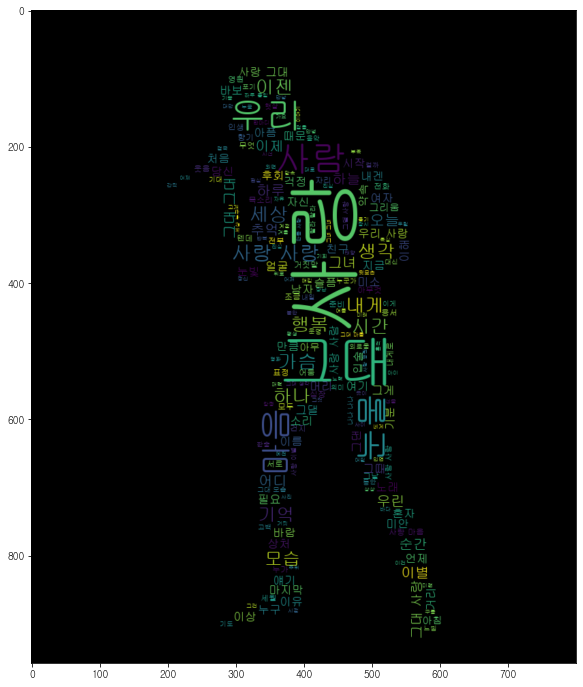

In [80]:
fig = plt.figure(figsize = (12,12))
plt.imshow(wc, interpolation='bilinear')
plt.show()
fig.savefig('wc_singer.png')

### summary :

* 멜론 시대별 차트에서 1990년대(1990년 ~ 1999년), 2000년대(2000년 ~ 2009년), 2010년대(2010년 ~ 2019년)의 top100 노래의 정보를 크롤링
* 각 시대별 유사곡 추천을 진행해본다.

* 각 데이터셋을 합쳐 전체 곡에서 유사곡 추천을 진행해본다. 
* 토큰화를 한 후 다시 유사곡을 검색해본다.

### 한계 :

* 가사라는 텍스트 데이터만 이용하여 마음에 드는 결과는 얻지 못했다.
* 토큰화를 진행하지 않아 상대적으로 유사곡 선정이 잘되지 않았다. -> Mecab으로 명사만 추출하여 해결
* 음악의 특성상 음역대, 목소리 등 음성 데이터도 이용할 수 있었다면 보다 좋은 결과를 얻을 수 있을 것이다.

## 감사합니다.